# EXAMPLES

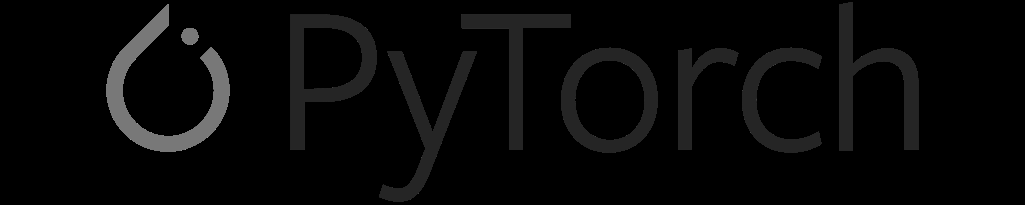

Canny


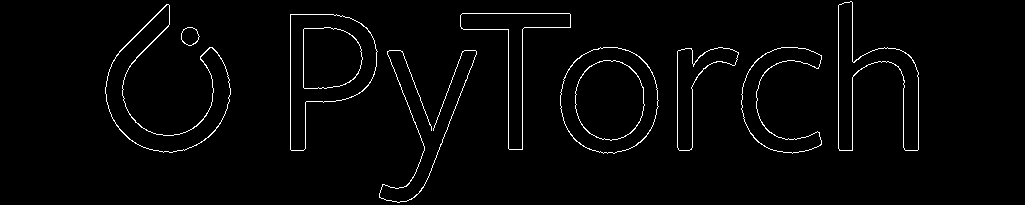

Sobel_x


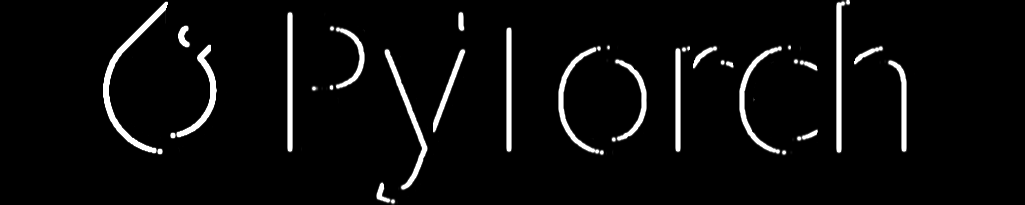

Sobel_y


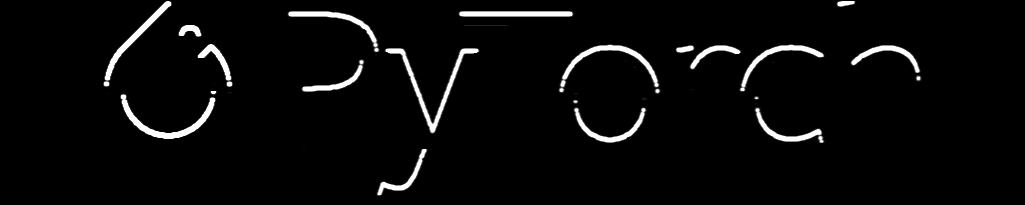

Sobel Simple


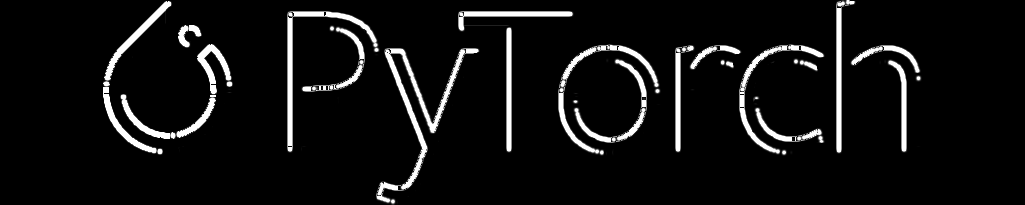

prewitet X


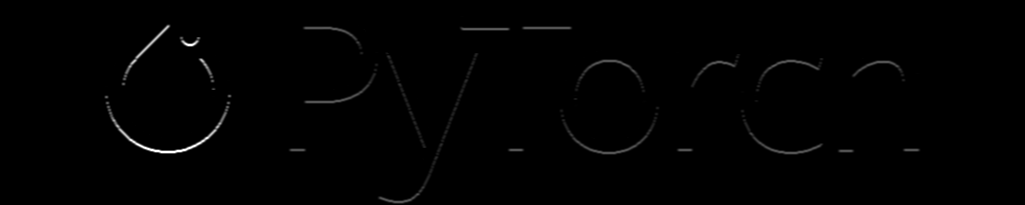

Prewitt Y


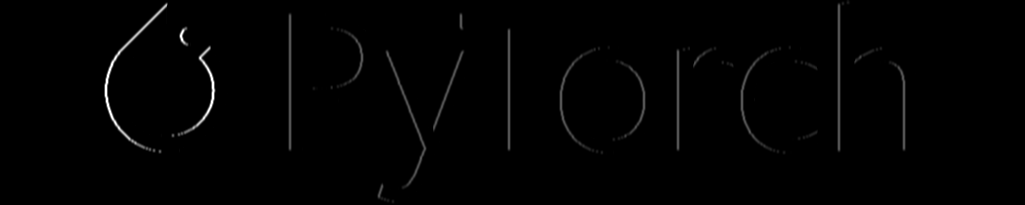

Simple


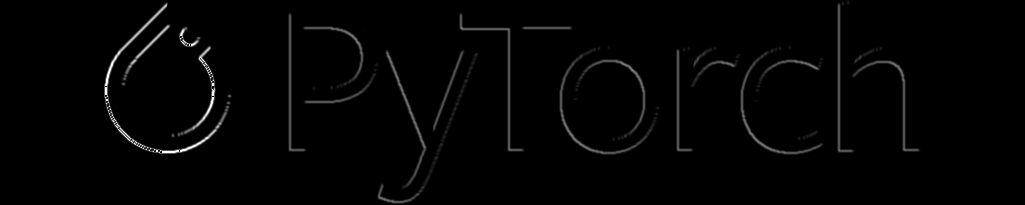

Laplacian


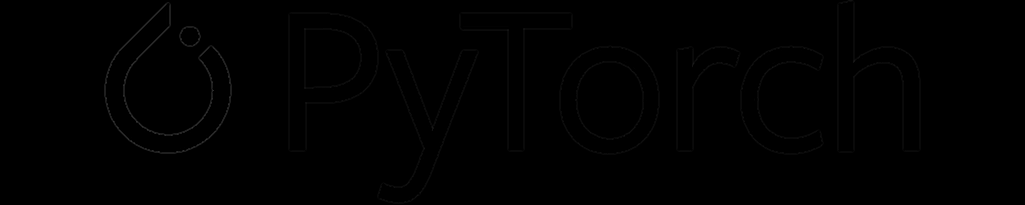

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/fyp/class activity 01/Lab - 2/Pytorch_logo.png',0)
cv2_imshow(img)
img_gaussian = cv2.GaussianBlur(img,(3,3),0)
#canny
img_canny = cv2.Canny(img,100,200)
#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
laplacian = cv2.Laplacian(img_gaussian,cv2.CV_64F)
print('Canny')
cv2_imshow(img_canny)
print('Sobel_x')
cv2_imshow(img_sobelx)
print('Sobel_y')
cv2_imshow(img_sobely)
print('Sobel Simple')
cv2_imshow(img_sobel)
print('prewitet X')
cv2_imshow(img_prewittx)
print('Prewitt Y')
cv2_imshow(img_prewitty)
print('Simple')
cv2_imshow(img_prewittx + img_prewitty)
print('Laplacian')
cv2_imshow(laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lab Task:


1. Write a python code for Canny edge detector without using built-in 
function and compare the result of edge detection of your code with the 
built-in function. 

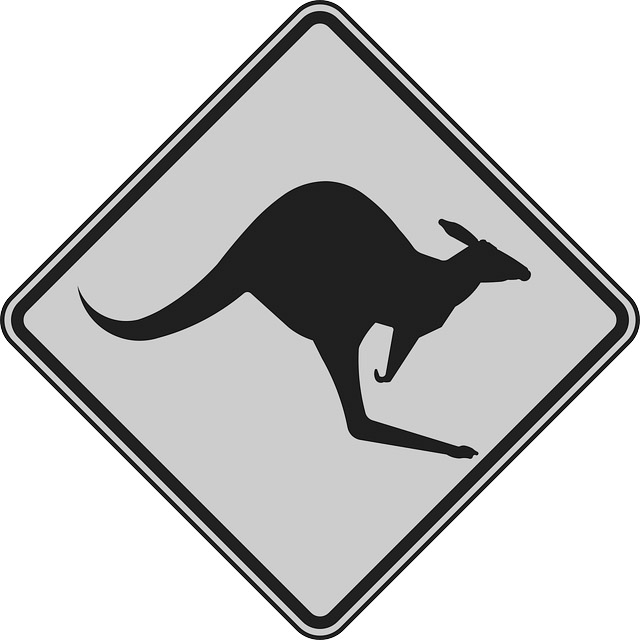

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/fyp/class activity 01/Lab - 2/kangaroo.jpg',0)
cv2_imshow(img)

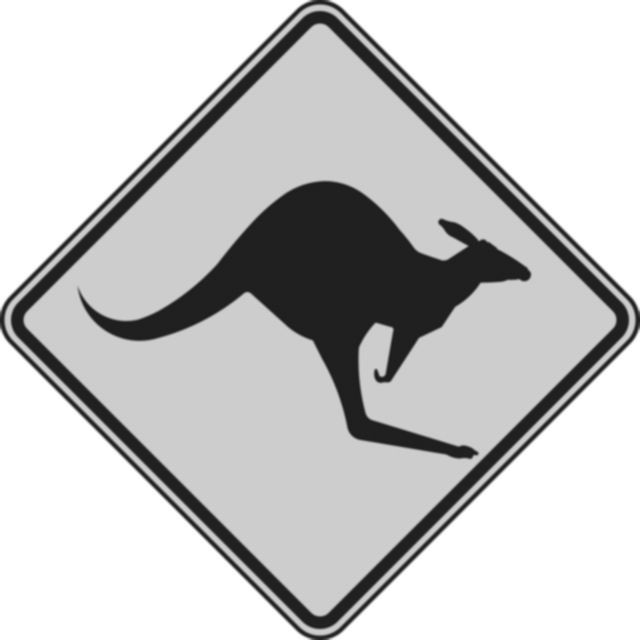

In [ ]:
img_gaussian = cv2.GaussianBlur(img,(5,5),0)
cv2_imshow(img_gaussian)

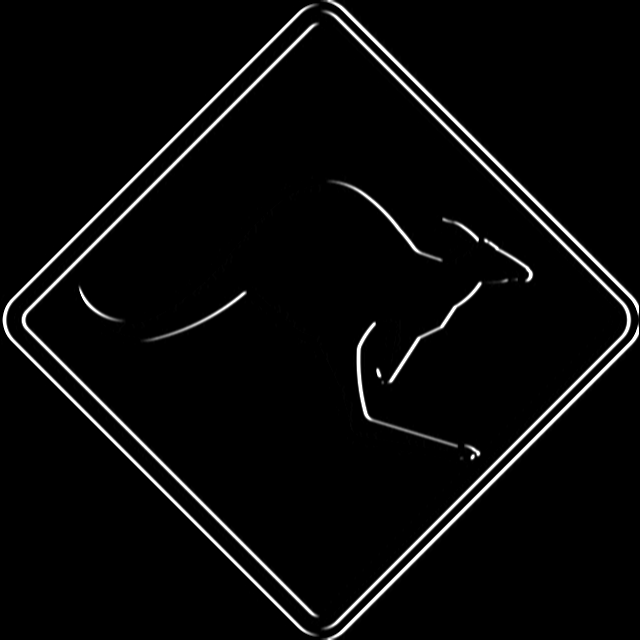

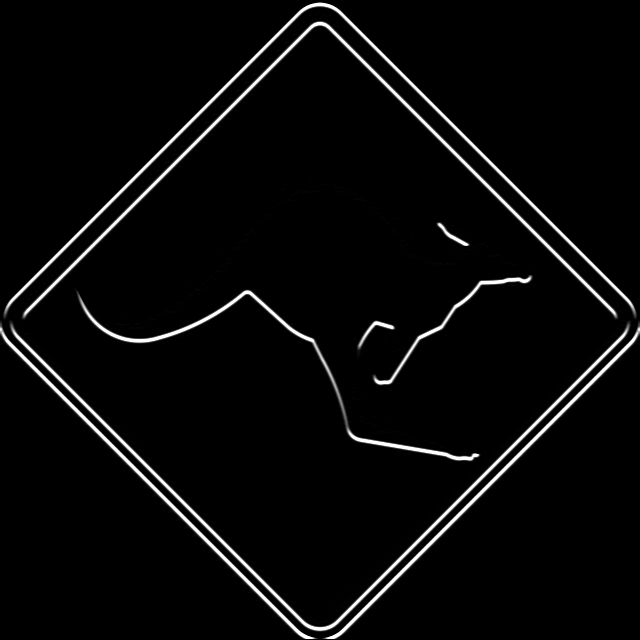

In [ ]:
#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
cv2_imshow(img_sobelx)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
cv2_imshow(img_sobely)

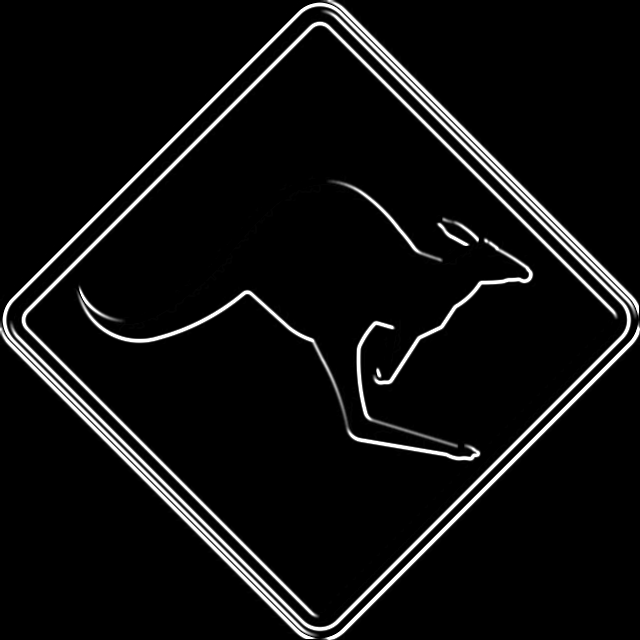

In [ ]:
#its actually combining sobel_x and sobel_y images
mag = np.hypot(img_sobelx, img_sobely)
cv2_imshow(mag)

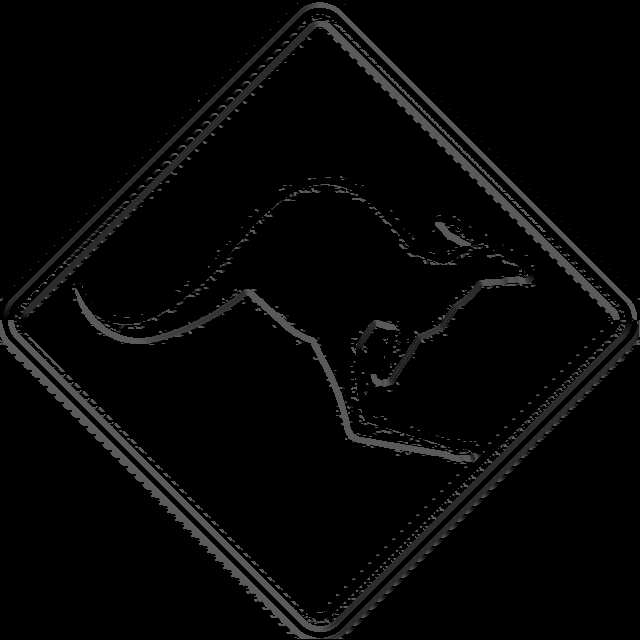

In [ ]:
#gradeintx = np.degrees(np.arctan2(img_sobelx,img_sobely))
gradeint = np.degrees(np.arctan2(img_sobely,img_sobelx))
#gradeint = np.hypot(gradeintx, gradeinty)
cv2_imshow(gradeint)


In [ ]:
# This is also non-maxima suppression but without interpolation i.e. the pixel closest to the gradient direction is used as the estimate
def NonMaxSup(Gmag, Grad):
    NMS = np.zeros(Gmag.shape)
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= -22.5 and Grad[i,j] <= 22.5) or (Grad[i,j] <= -157.5 and Grad[i,j] >= 157.5)):
                if((Gmag[i,j] > Gmag[i,j+1]) and (Gmag[i,j] > Gmag[i,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 22.5 and Grad[i,j] <= 67.5) or (Grad[i,j] <= -112.5 and Grad[i,j] >= -157.5)):
                if((Gmag[i,j] > Gmag[i+1,j+1]) and (Gmag[i,j] > Gmag[i-1,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 67.5 and Grad[i,j] <= 112.5) or (Grad[i,j] <= -67.5 and Grad[i,j] >= -112.5)):
                if((Gmag[i,j] > Gmag[i+1,j]) and (Gmag[i,j] > Gmag[i-1,j])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 112.5 and Grad[i,j] <= 157.5) or (Grad[i,j] <= -22.5 and Grad[i,j] >= -67.5)):
                if((Gmag[i,j] > Gmag[i+1,j-1]) and (Gmag[i,j] > Gmag[i-1,j+1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0

    return NMS

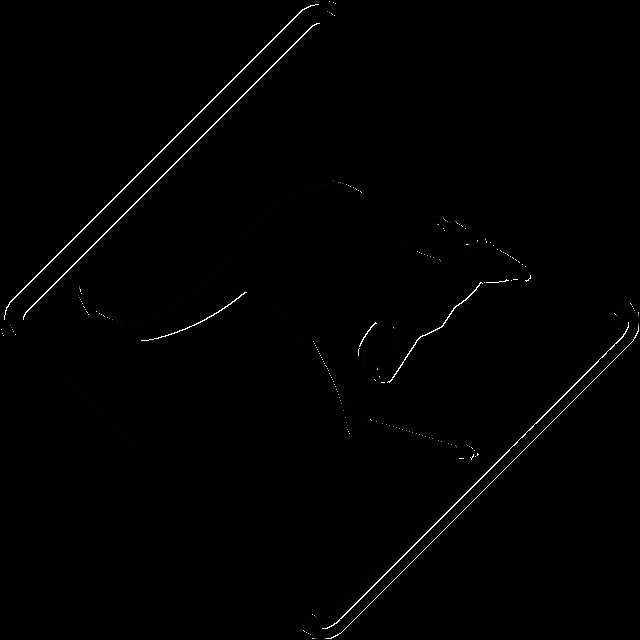

360.5
Nrmalized


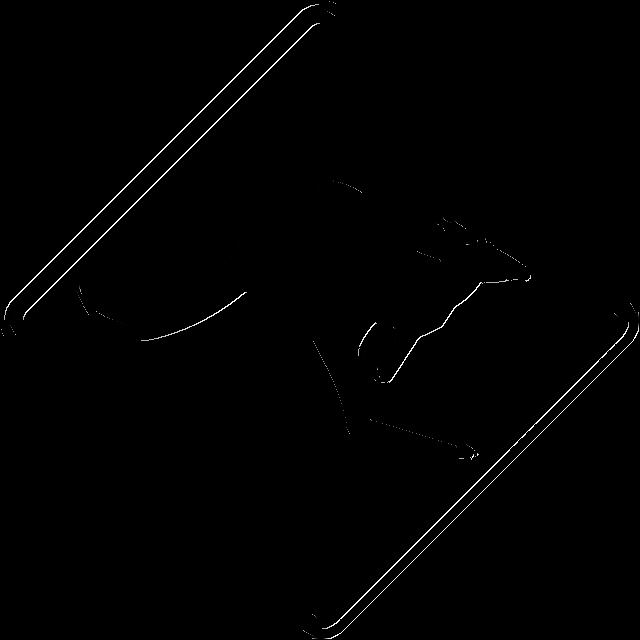

In [ ]:
img_NMS = NonMaxSup(mag, gradeint)
cv2_imshow(img_NMS)
print(np.max(img_NMS))
def Normalize(img):
    img = np.multiply(img, 255 / np.max(img))
    #img = img/np.max(img)
    return img
img_NMS = Normalize(img_NMS)
print('Nrmalized')
cv2_imshow(img_NMS)

In [ ]:
# Double threshold Hysterisis
# Note that I have used a very slow iterative approach for ease of understanding, a faster implementation using recursion can be done instead
# This recursive approach would recurse through every strong edge and find all connected weak edges
def DoThreshHyst(img):
    highThresholdRatio =0.4
    lowThresholdRatio = 0.2
    GSup = np.copy(img)
    print(np.max(GSup))
    h = int(GSup.shape[0])
    w = int(GSup.shape[1])
    highThreshold = np.max(GSup) * highThresholdRatio
    print(highThreshold)
    lowThreshold = highThreshold * lowThresholdRatio    
    x = 0.1
    oldx=0
    
    # The while loop is used so that the loop will keep executing till the number of strong edges do not change, i.e all weak edges connected to strong edges have been found
#     while(oldx != x):
#         oldx = x
    for i in range(1,h-1):
        for j in range(1,w-1):
            if(GSup[i,j] > highThreshold):
                GSup[i,j] = 255
            elif(GSup[i,j] < lowThreshold):
                GSup[i,j] = 0
            else:
                if((GSup[i-1,j-1] > highThreshold) or 
                    (GSup[i-1,j] > highThreshold) or
                    (GSup[i-1,j+1] > highThreshold) or
                    (GSup[i,j-1] > highThreshold) or
                    (GSup[i,j+1] > highThreshold) or
                    (GSup[i+1,j-1] > highThreshold) or
                    (GSup[i+1,j] > highThreshold) or
                    (GSup[i+1,j+1] > highThreshold)):
                    GSup[i,j] = 1
#         x = np.sum(GSup == 1)
    cv2_imshow(GSup)
    GSup =  (GSup) * (GSup)# This is done to remove/clean all the weak edges which are not connected to strong edges
    
    return GSup

255.0
102.0


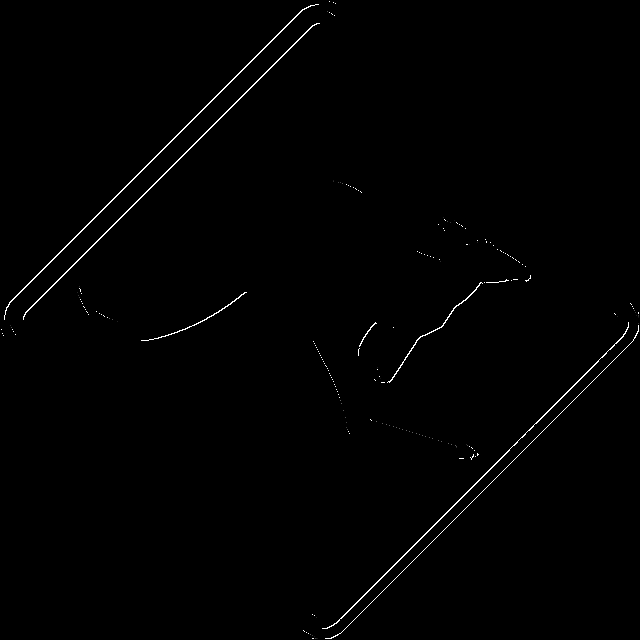

Finalimage after applying self coded canny algo


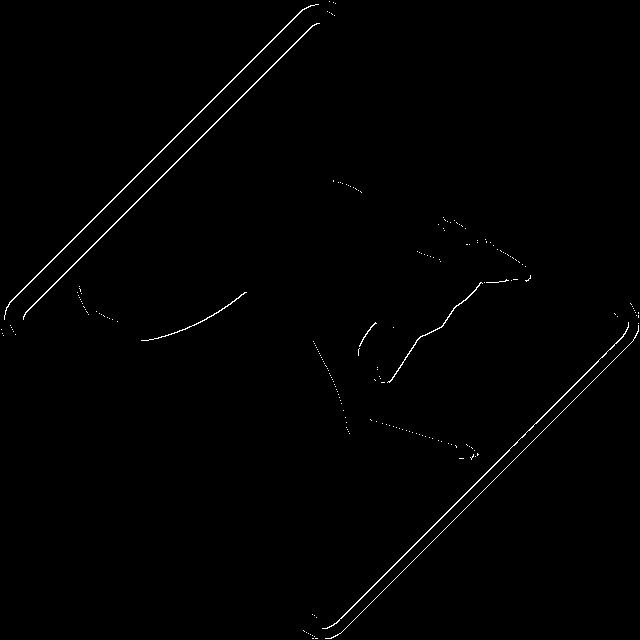

image result after applying the builtin Canny function


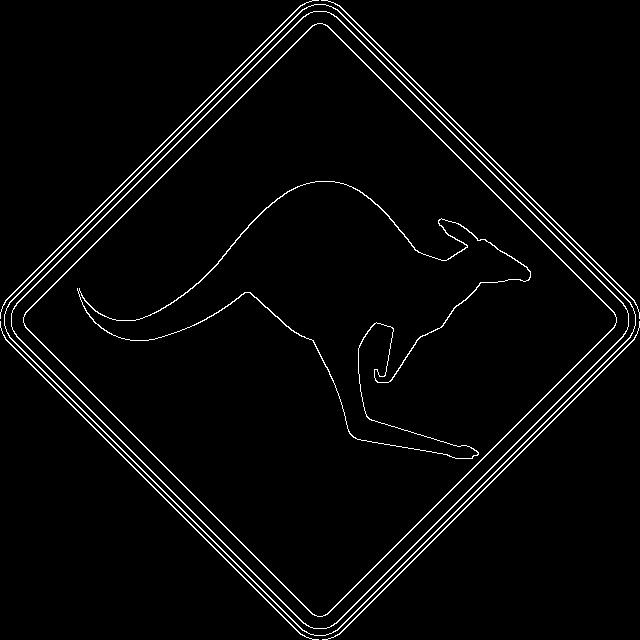

In [ ]:
Final_Image = DoThreshHyst(img_NMS)
print('Finalimage after applying self coded canny algo')
cv2_imshow(Final_Image)
print('image result after applying the builtin Canny function')
img_canny = cv2.Canny(img,100,200)
cv2_imshow(img_canny)


2. Write a small application to find the Canny edge detection whose threshold 
values can be varied using two trackbars. This way, you can understand 
the effect of threshold values.

lowerThreshold =1
upperThreshold =320


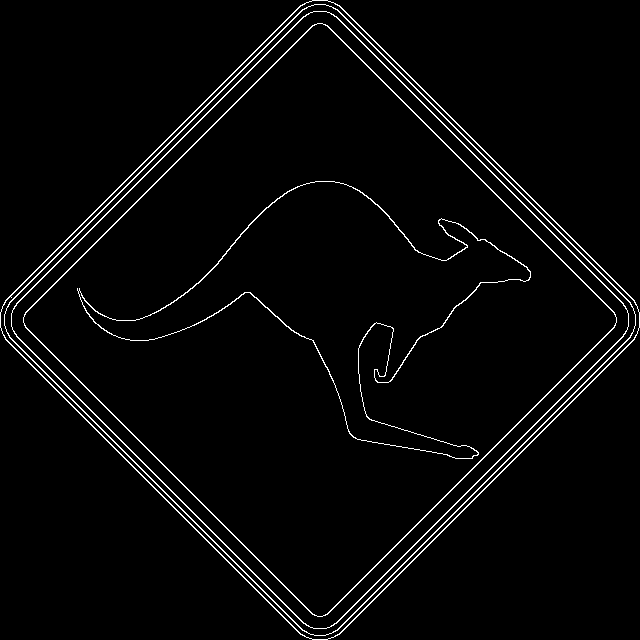

lowerThreshold =1
upperThreshold =300


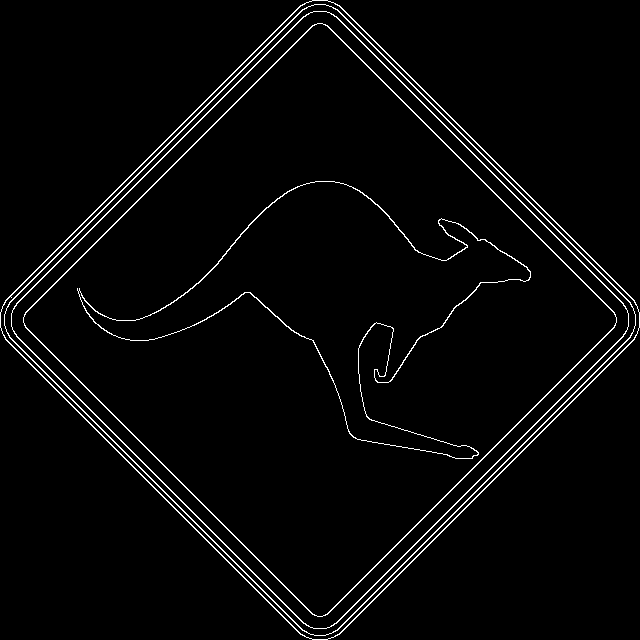

lowerThreshold =1
upperThreshold =250


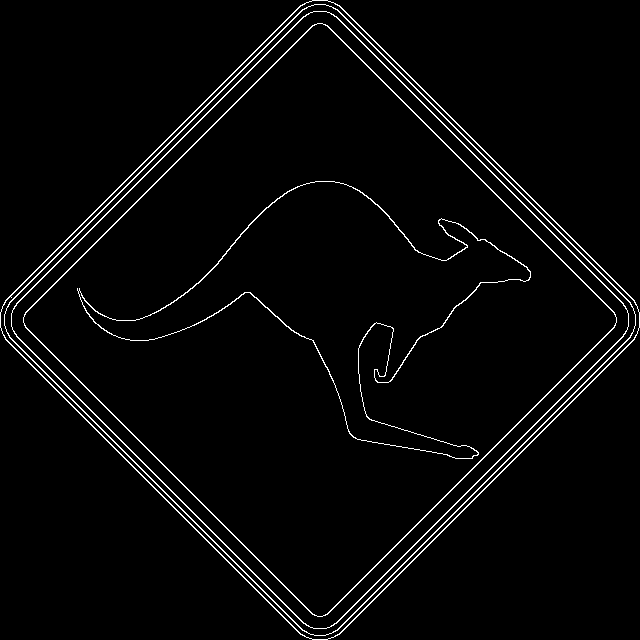

lowerThreshold =1
upperThreshold =200


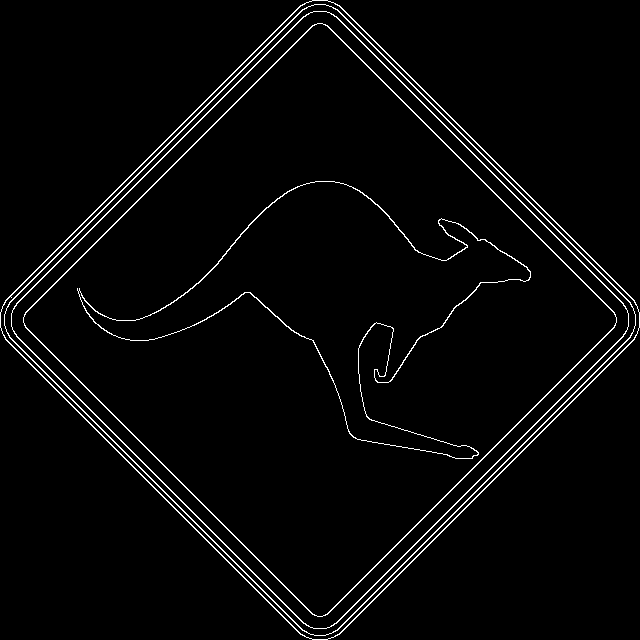

lowerThreshold =1
upperThreshold =150


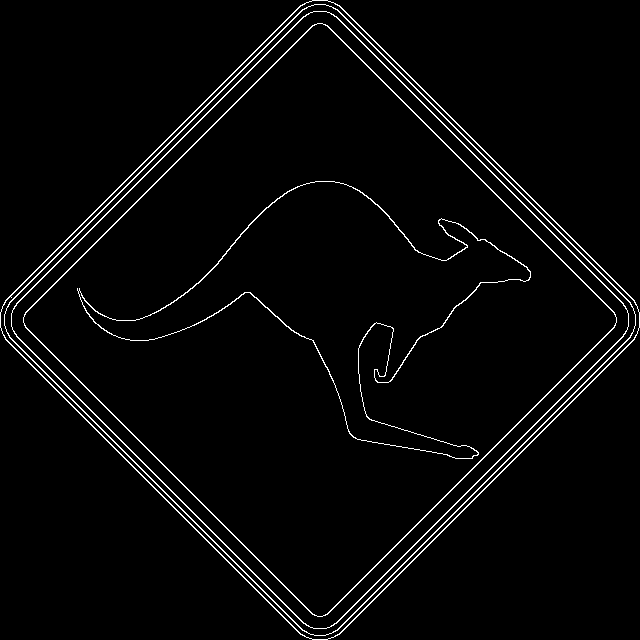

lowerThreshold =1
upperThreshold =100


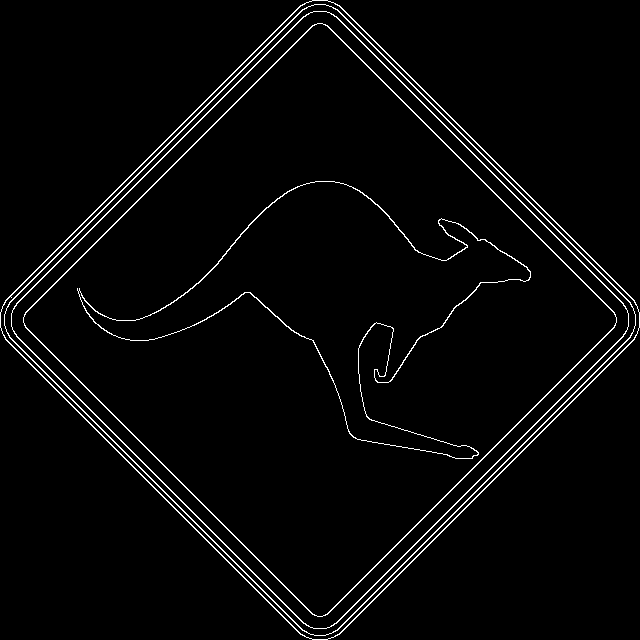

lowerThreshold =1
upperThreshold =50


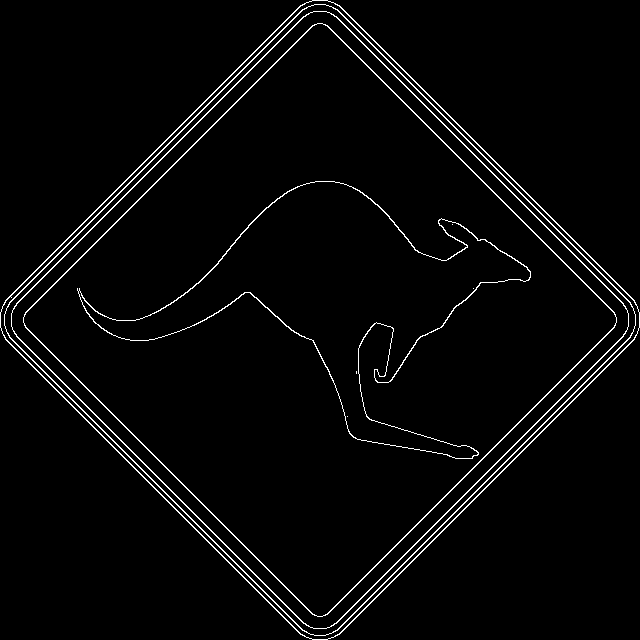

lowerThreshold =1
upperThreshold =10


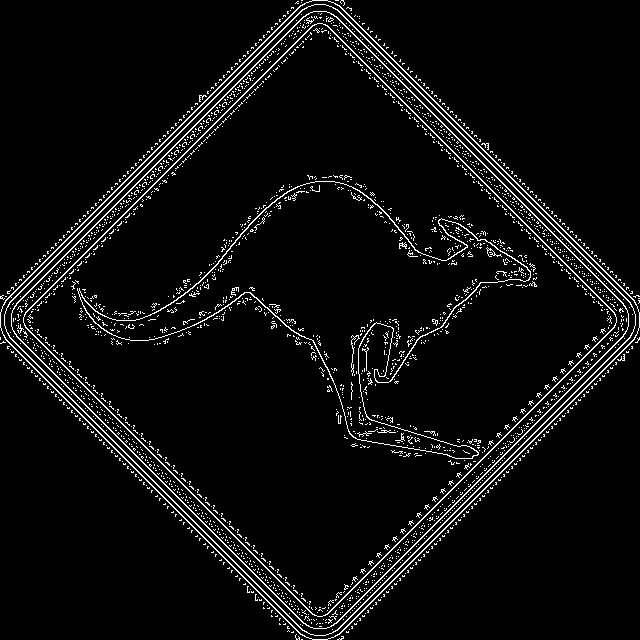

lowerThreshold =10
upperThreshold =320


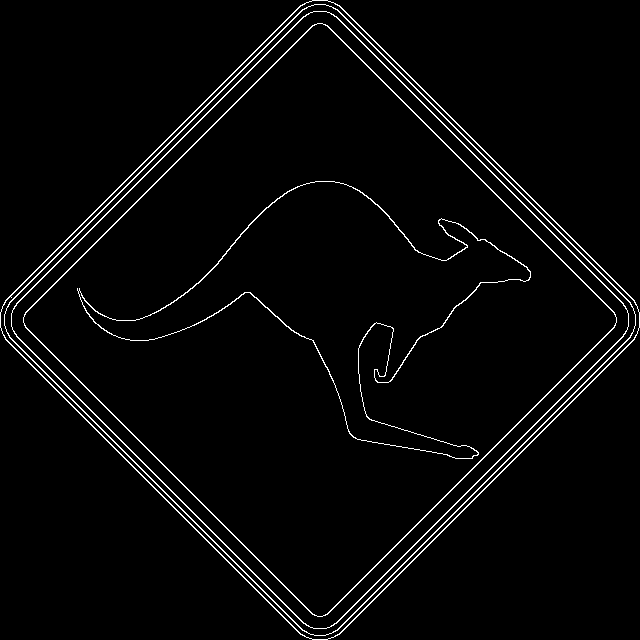

lowerThreshold =10
upperThreshold =300


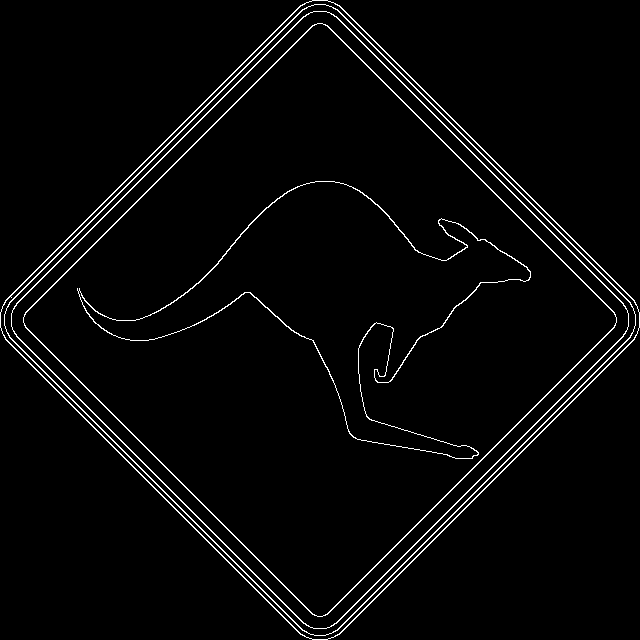

lowerThreshold =10
upperThreshold =250


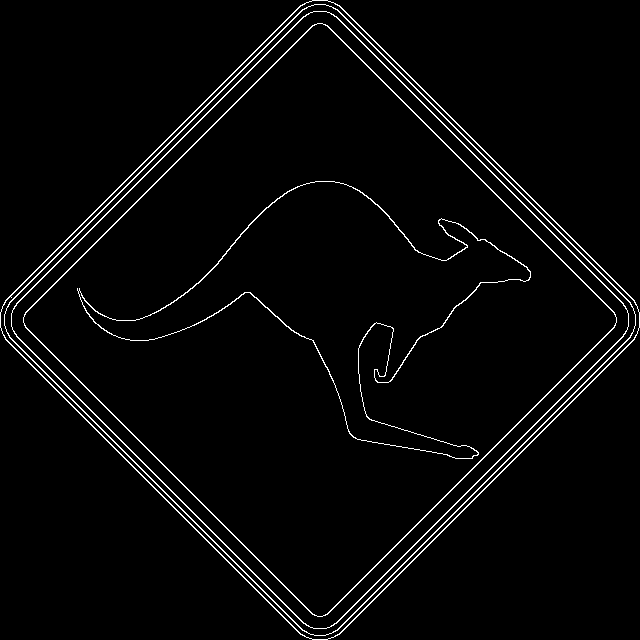

lowerThreshold =10
upperThreshold =200


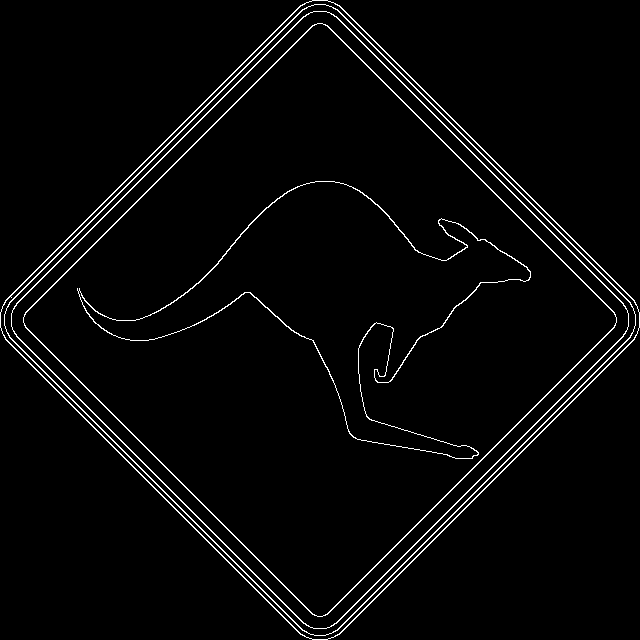

lowerThreshold =10
upperThreshold =150


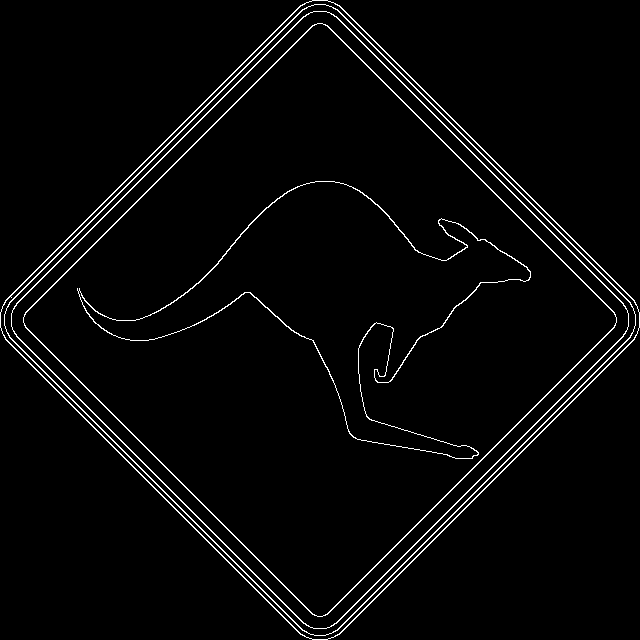

lowerThreshold =10
upperThreshold =100


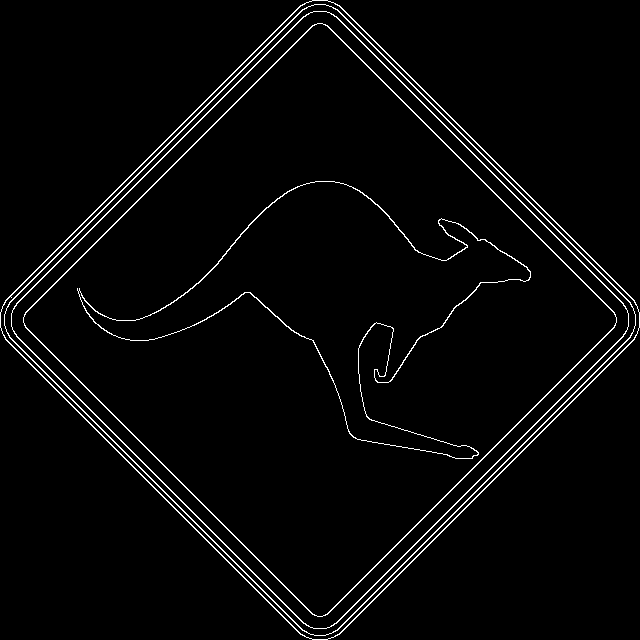

lowerThreshold =10
upperThreshold =50


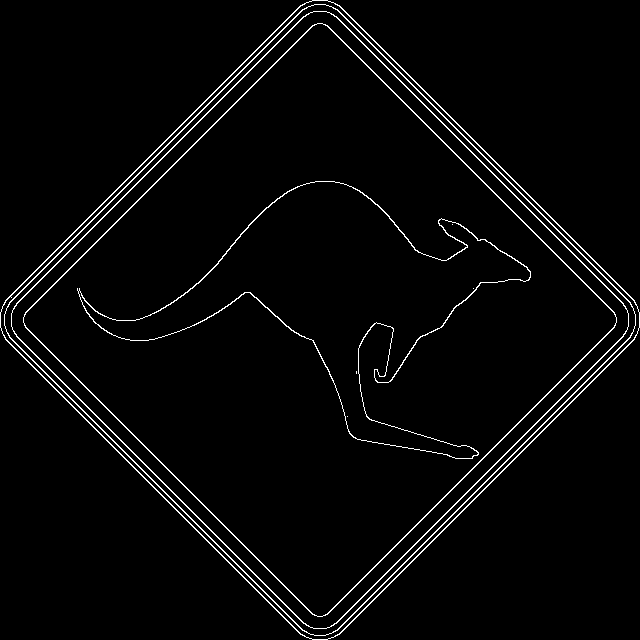

lowerThreshold =10
upperThreshold =10


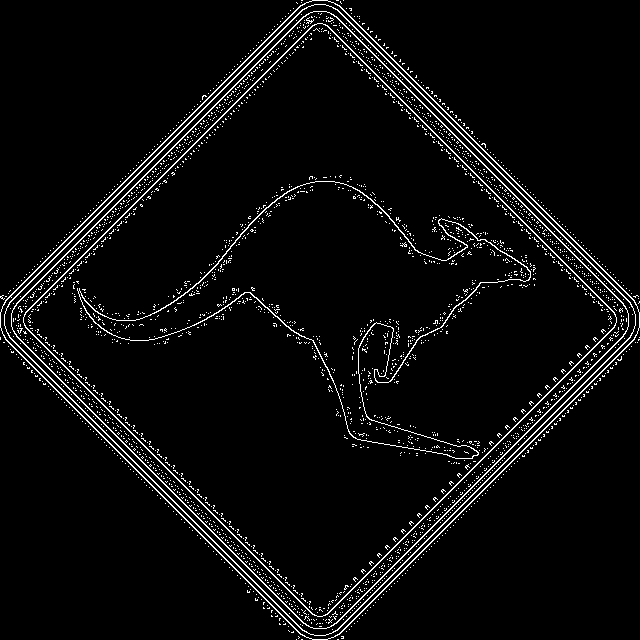

lowerThreshold =50
upperThreshold =320


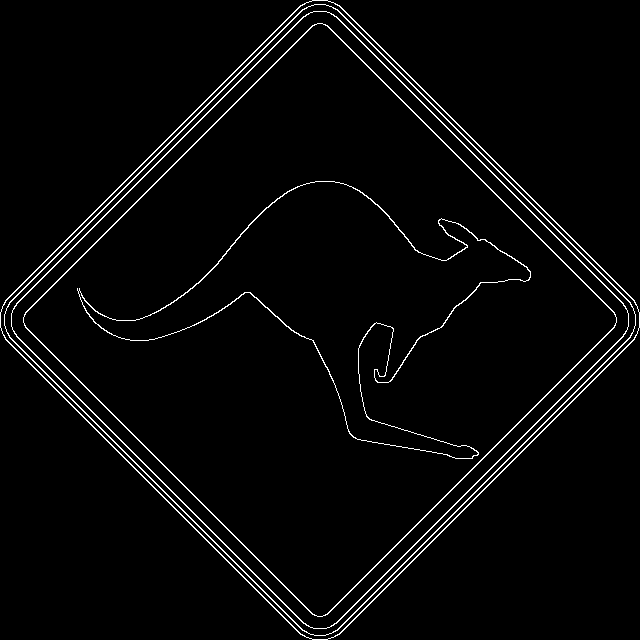

lowerThreshold =50
upperThreshold =300


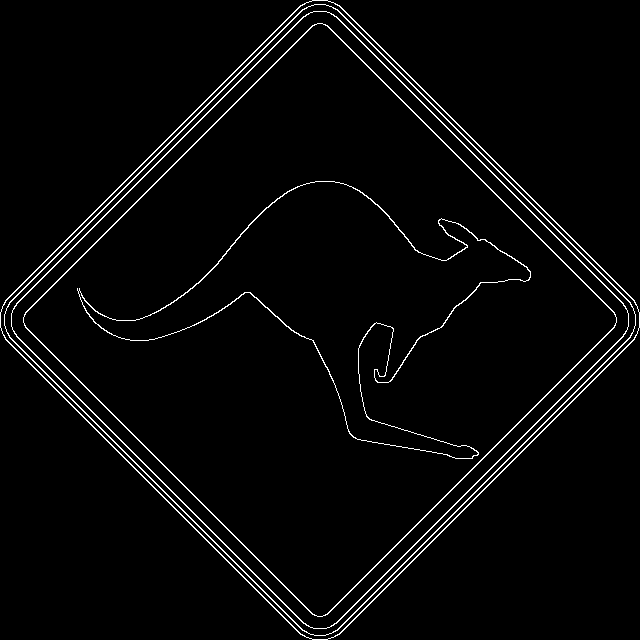

lowerThreshold =50
upperThreshold =250


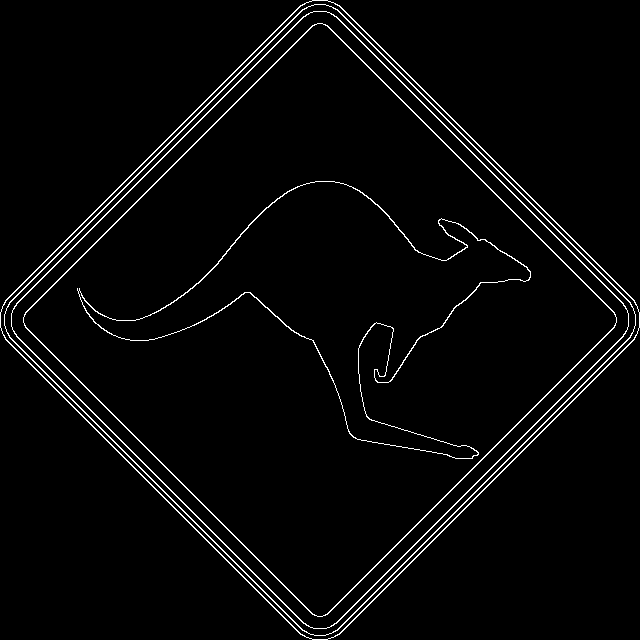

lowerThreshold =50
upperThreshold =200


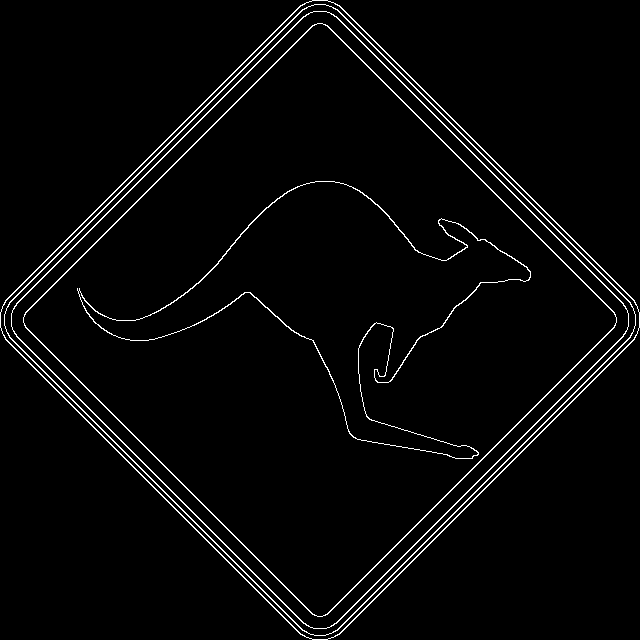

lowerThreshold =50
upperThreshold =150


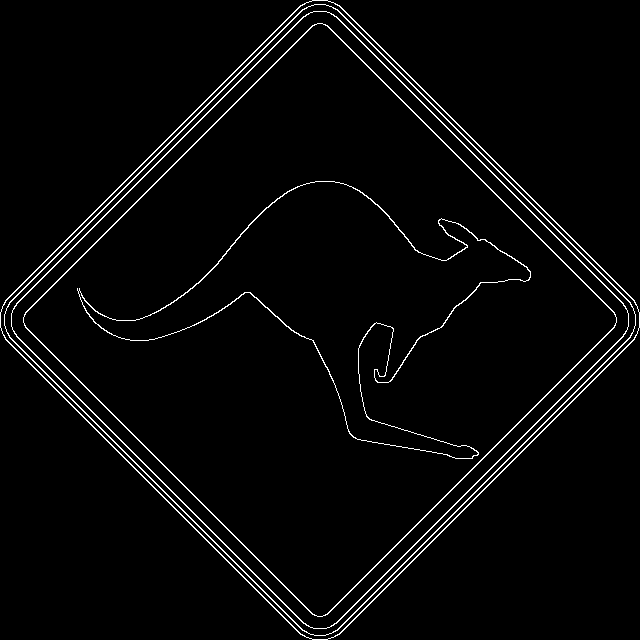

lowerThreshold =50
upperThreshold =100


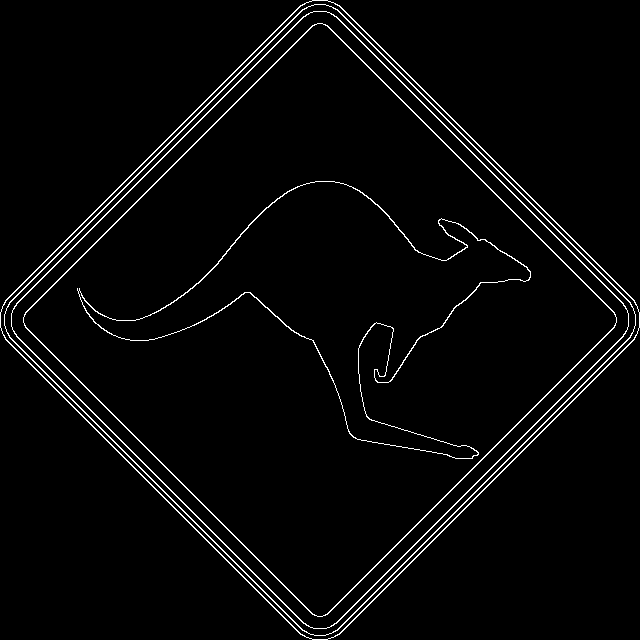

lowerThreshold =50
upperThreshold =50


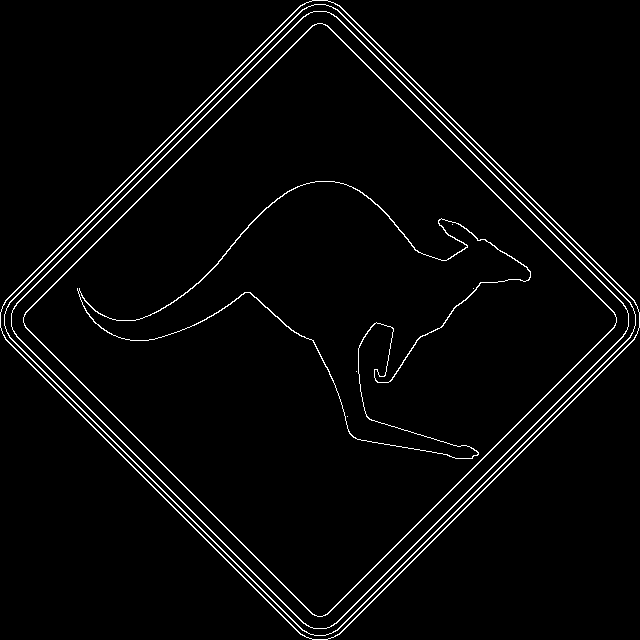

lowerThreshold =50
upperThreshold =10


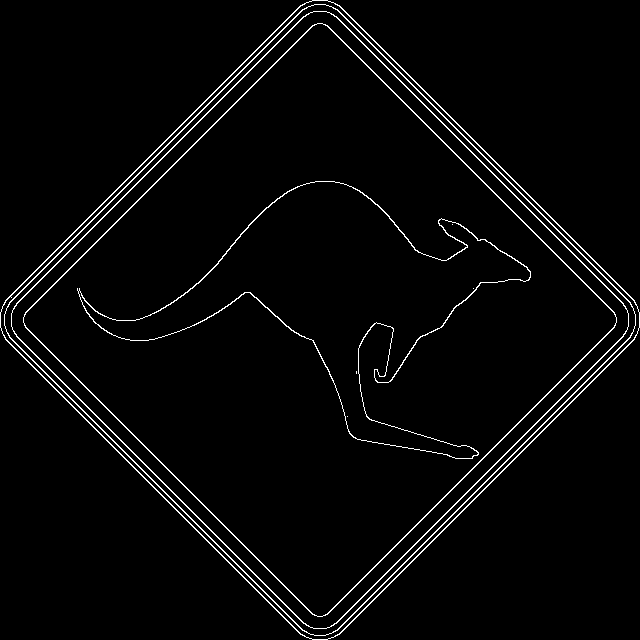

lowerThreshold =100
upperThreshold =320


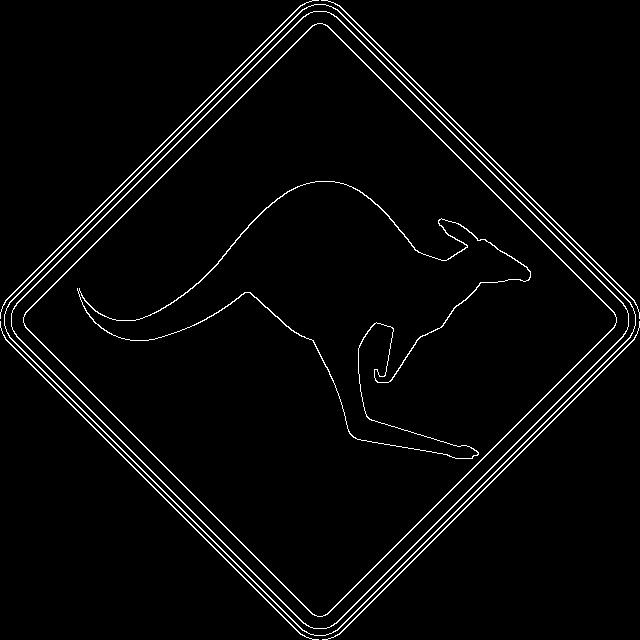

lowerThreshold =100
upperThreshold =300


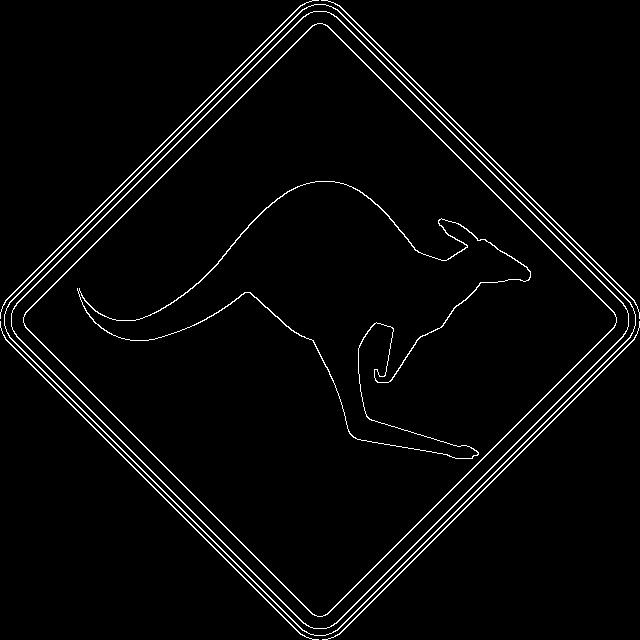

lowerThreshold =100
upperThreshold =250


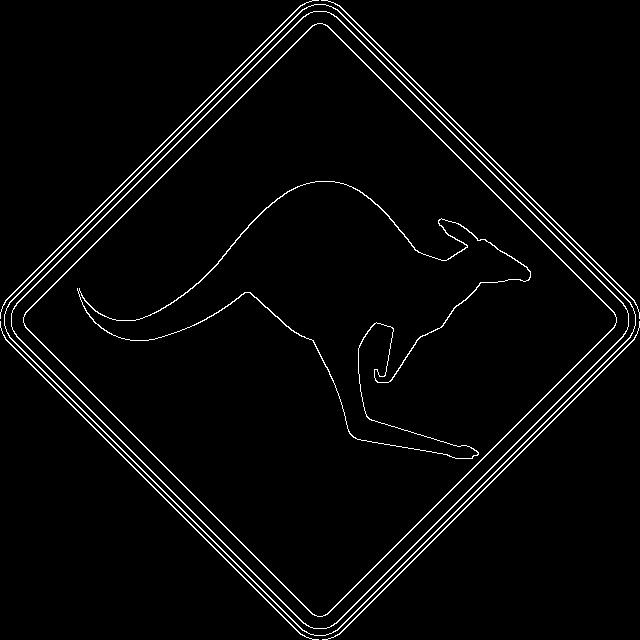

lowerThreshold =100
upperThreshold =200


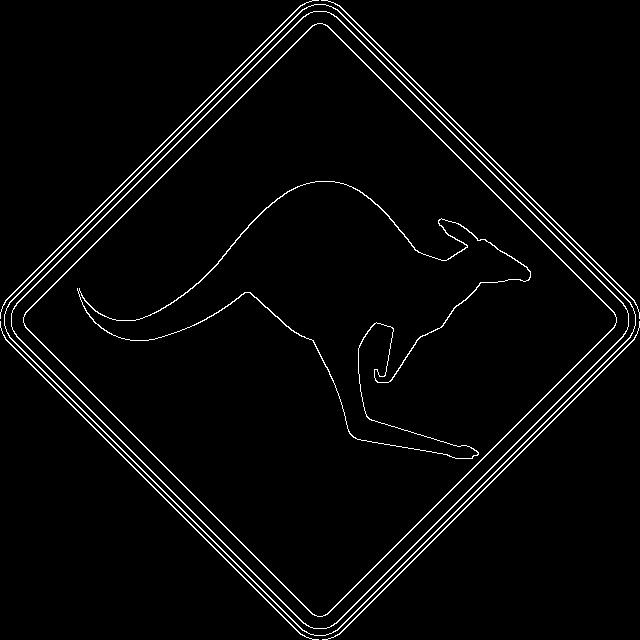

lowerThreshold =100
upperThreshold =150


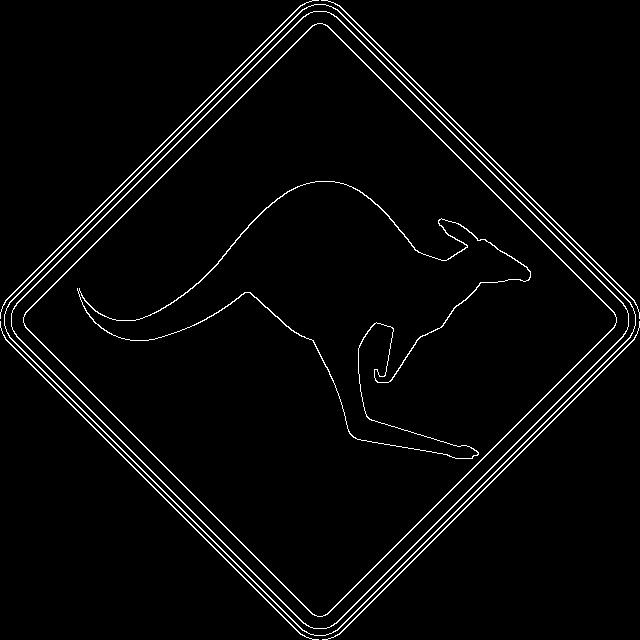

lowerThreshold =100
upperThreshold =100


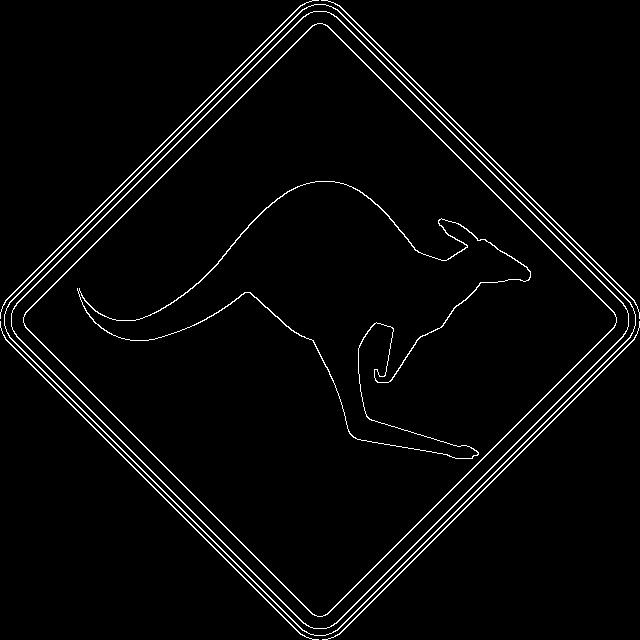

lowerThreshold =100
upperThreshold =50


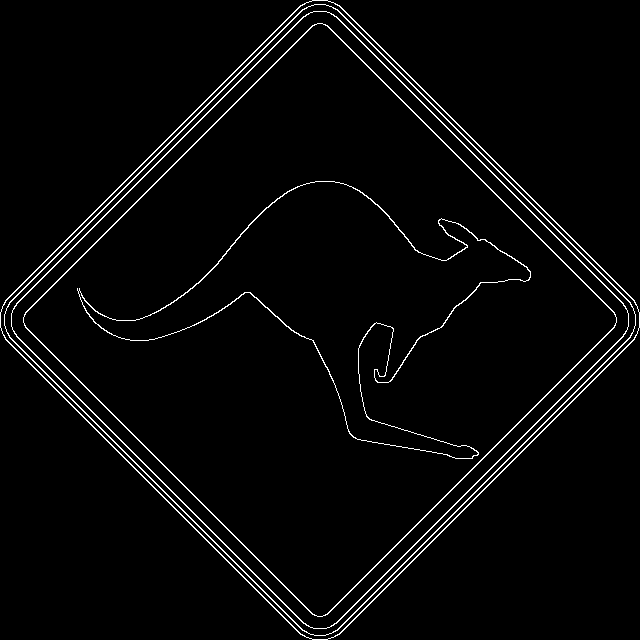

lowerThreshold =100
upperThreshold =10


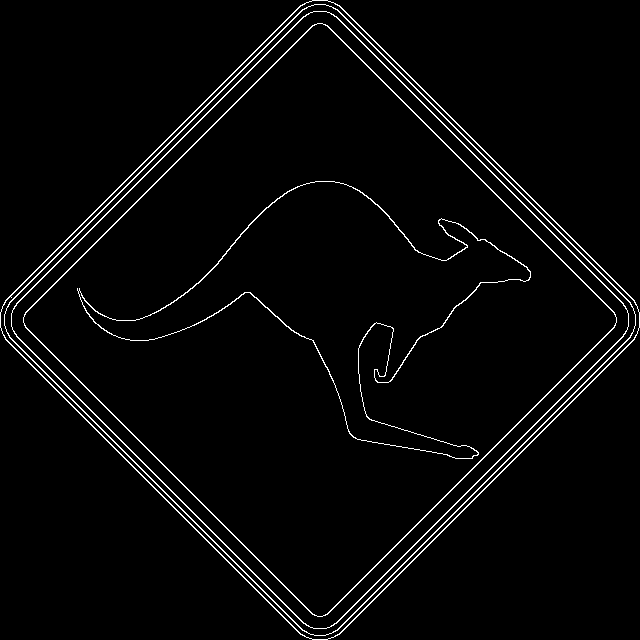

lowerThreshold =150
upperThreshold =320


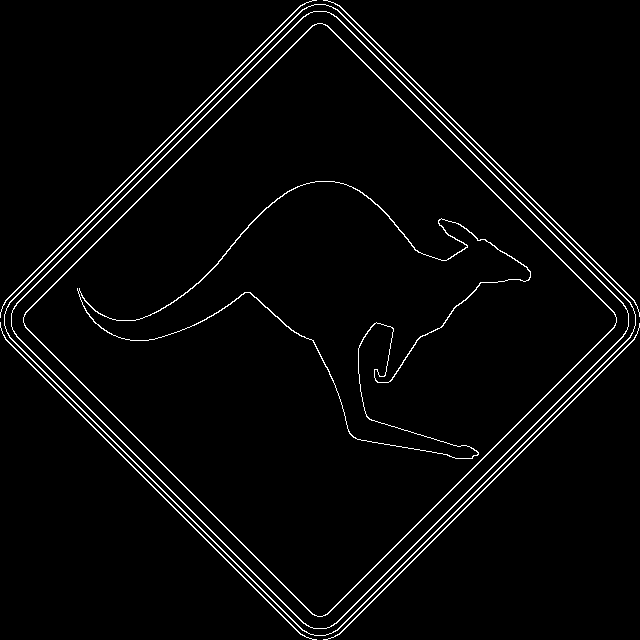

lowerThreshold =150
upperThreshold =300


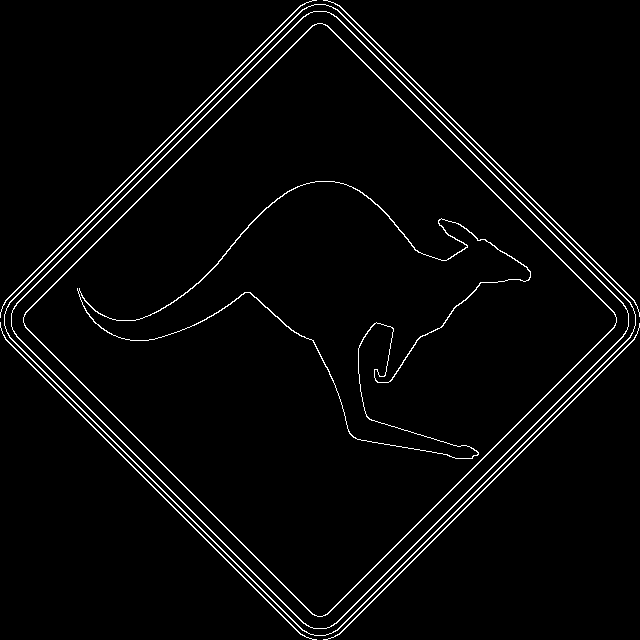

lowerThreshold =150
upperThreshold =250


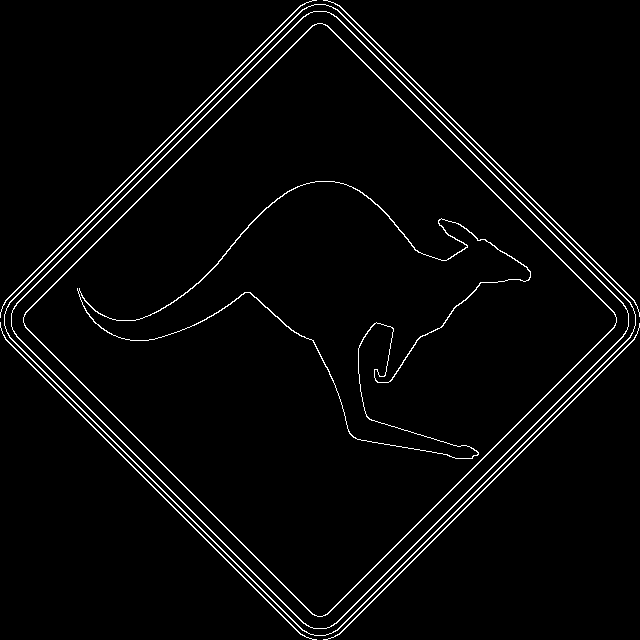

lowerThreshold =150
upperThreshold =200


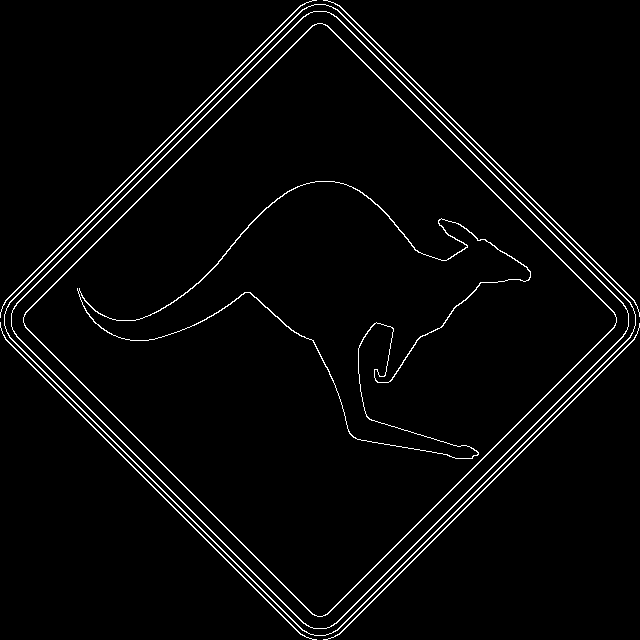

lowerThreshold =150
upperThreshold =150


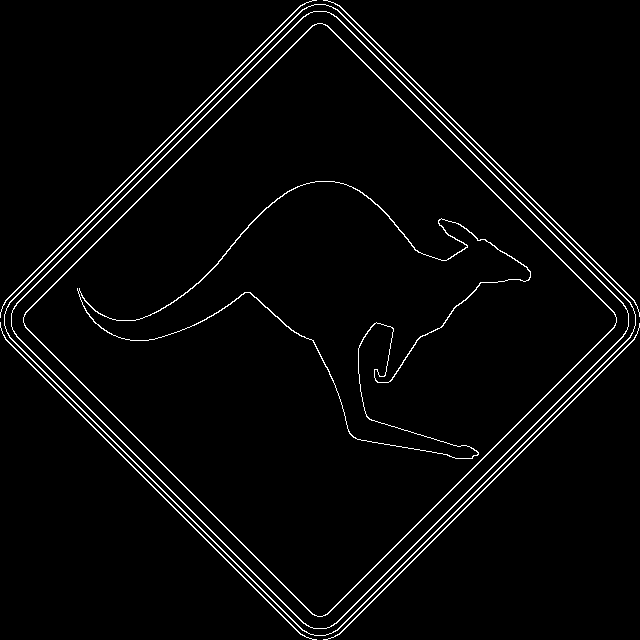

lowerThreshold =150
upperThreshold =100


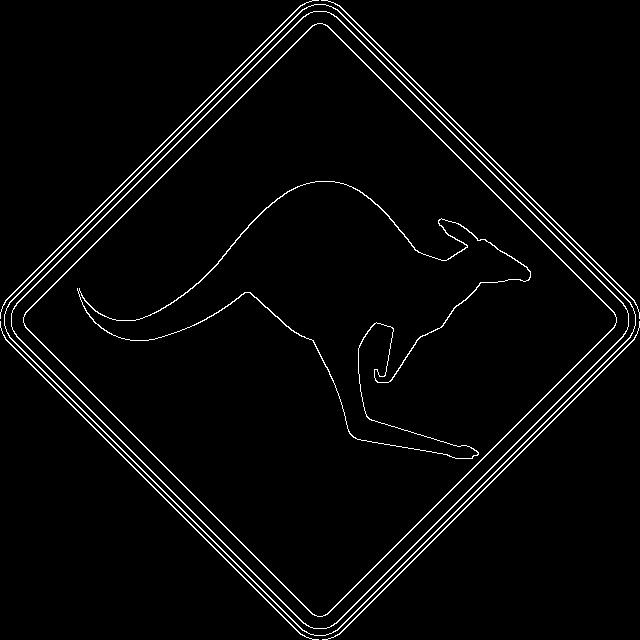

lowerThreshold =150
upperThreshold =50


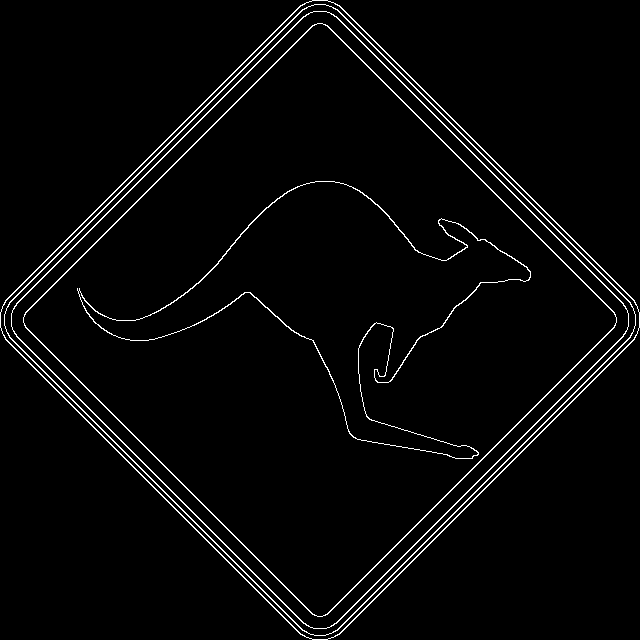

lowerThreshold =150
upperThreshold =10


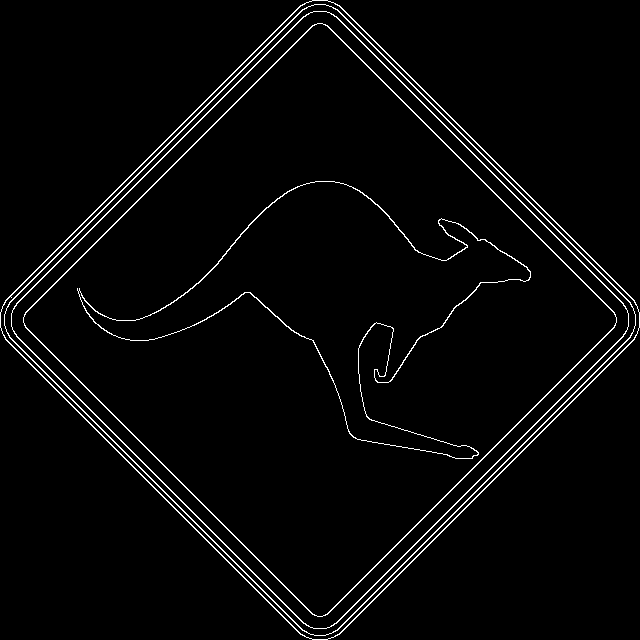

lowerThreshold =200
upperThreshold =320


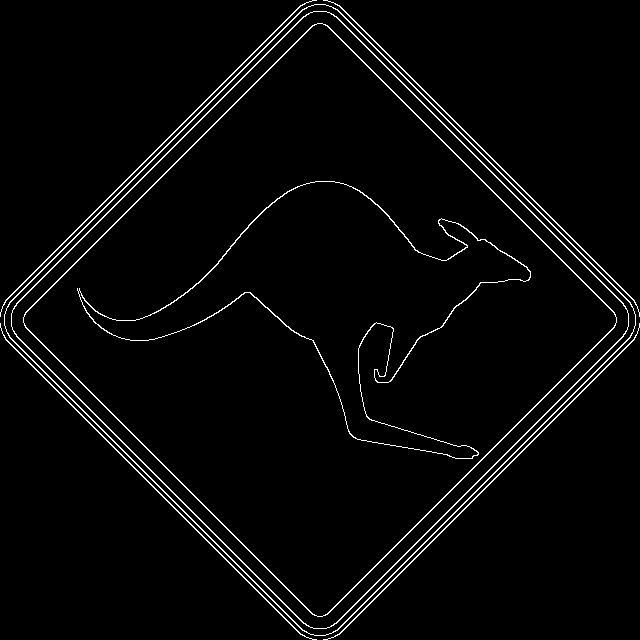

lowerThreshold =200
upperThreshold =300


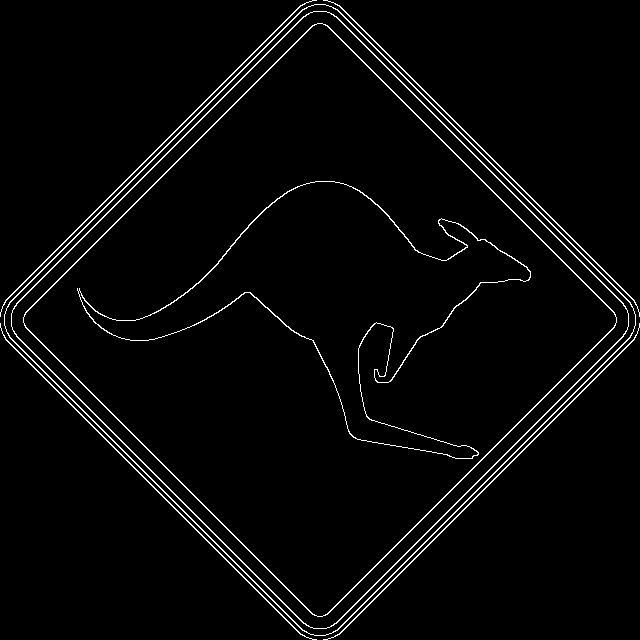

lowerThreshold =200
upperThreshold =250


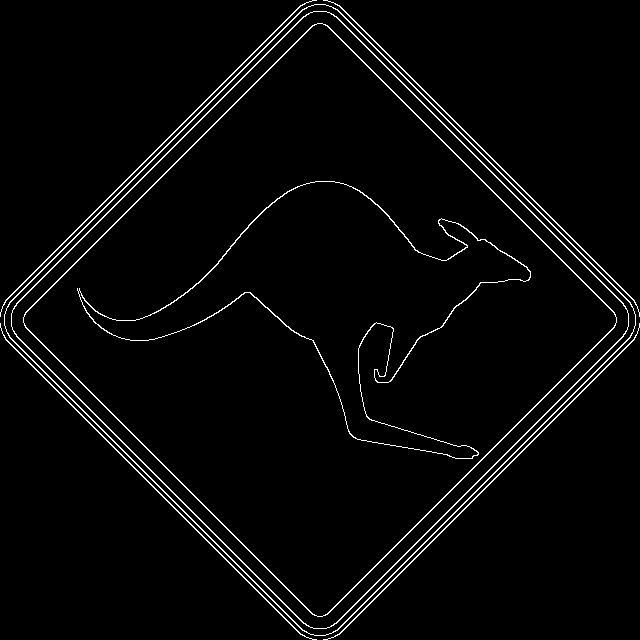

lowerThreshold =200
upperThreshold =200


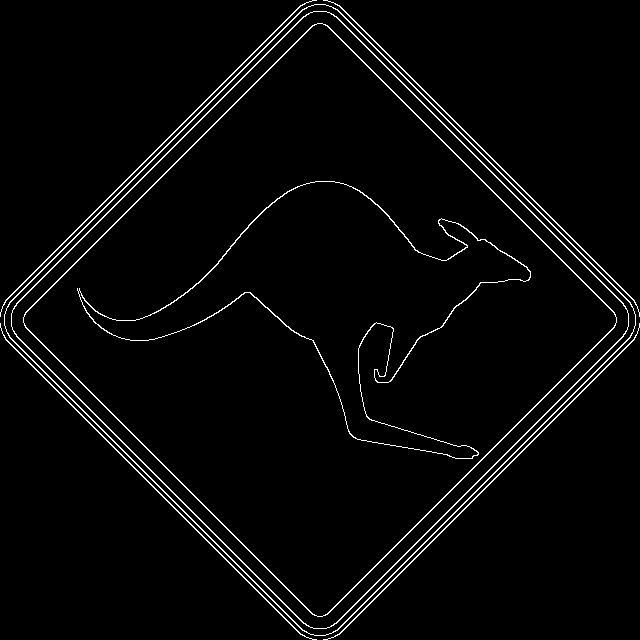

lowerThreshold =200
upperThreshold =150


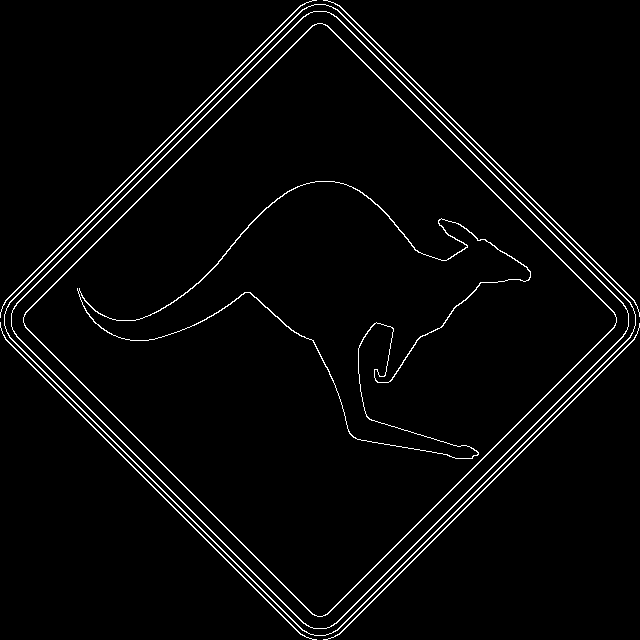

lowerThreshold =200
upperThreshold =100


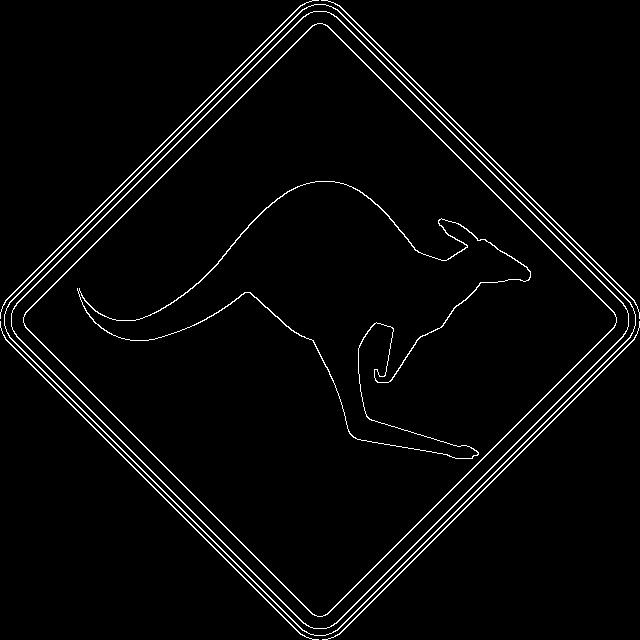

lowerThreshold =200
upperThreshold =50


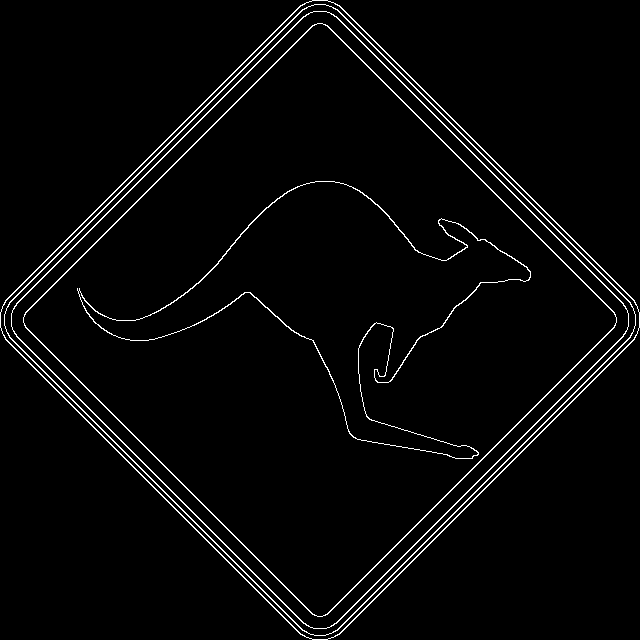

lowerThreshold =200
upperThreshold =10


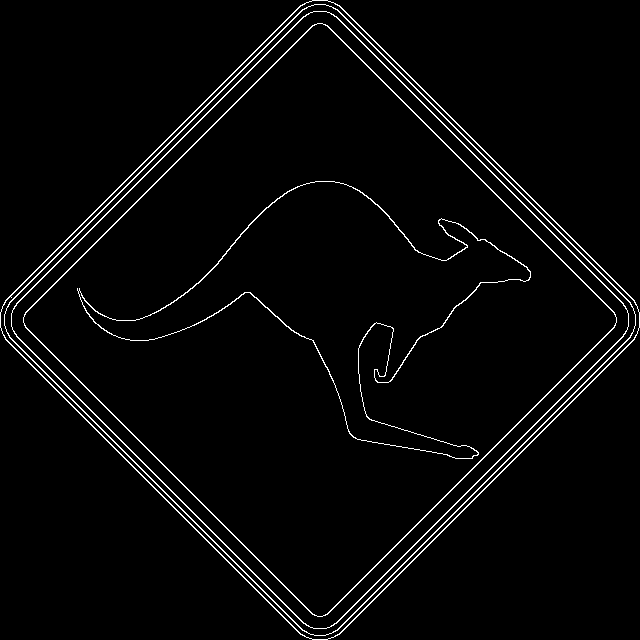

lowerThreshold =250
upperThreshold =320


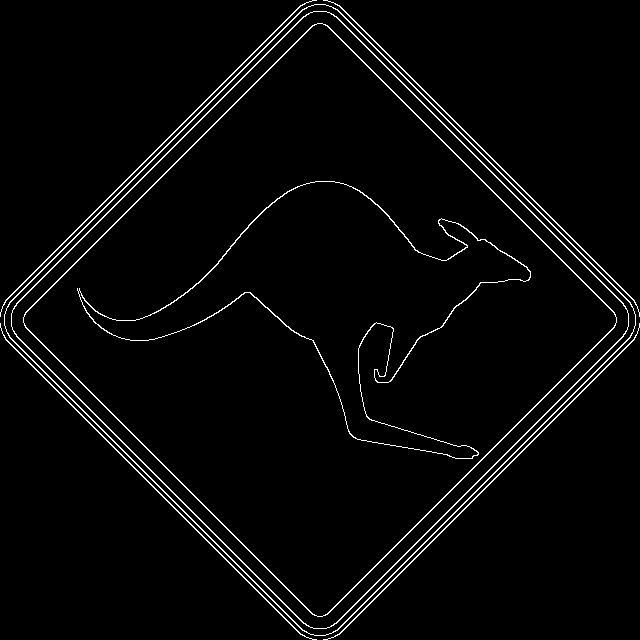

lowerThreshold =250
upperThreshold =300


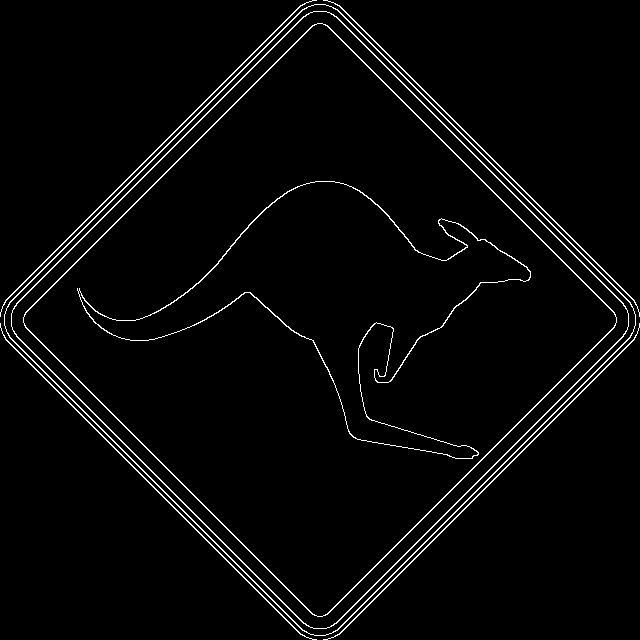

lowerThreshold =250
upperThreshold =250


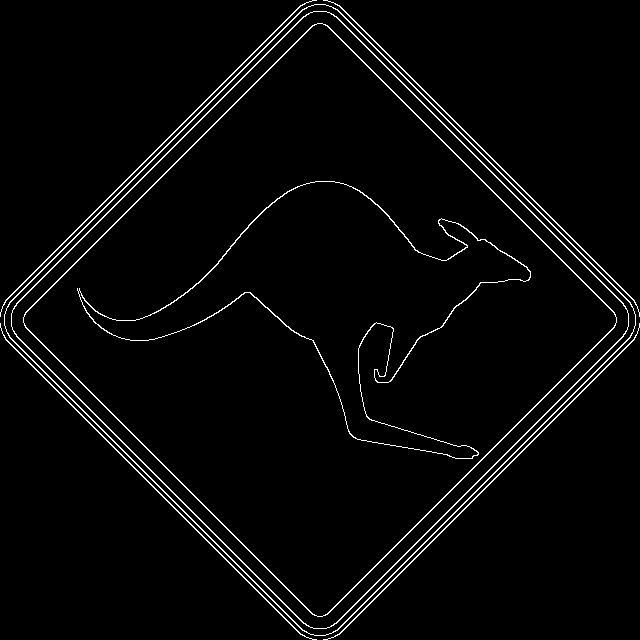

lowerThreshold =250
upperThreshold =200


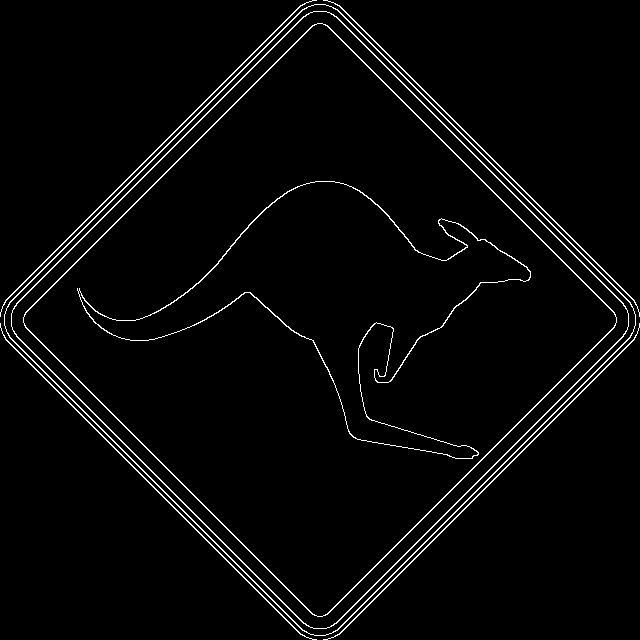

lowerThreshold =250
upperThreshold =150


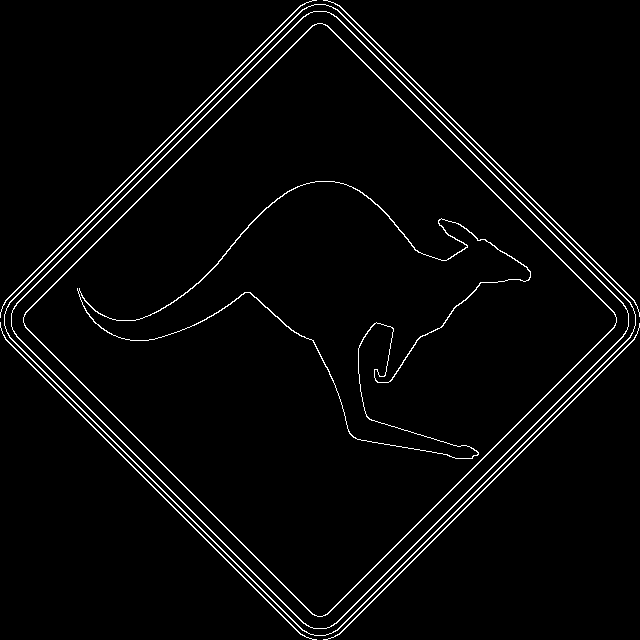

lowerThreshold =250
upperThreshold =100


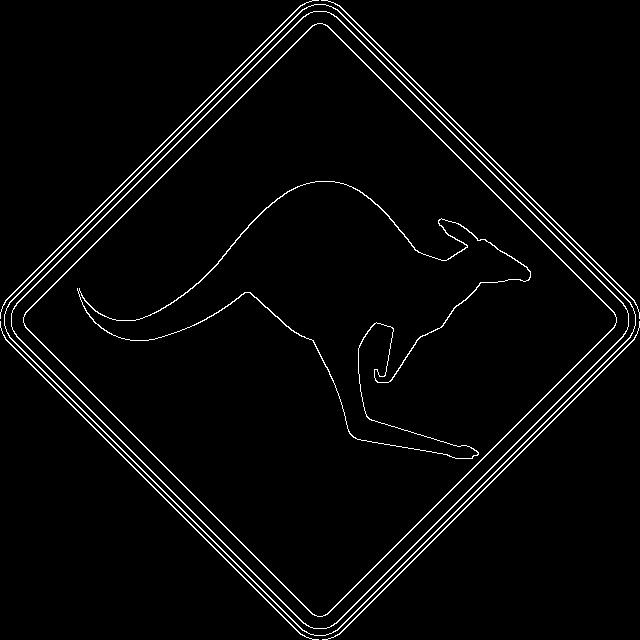

lowerThreshold =250
upperThreshold =50


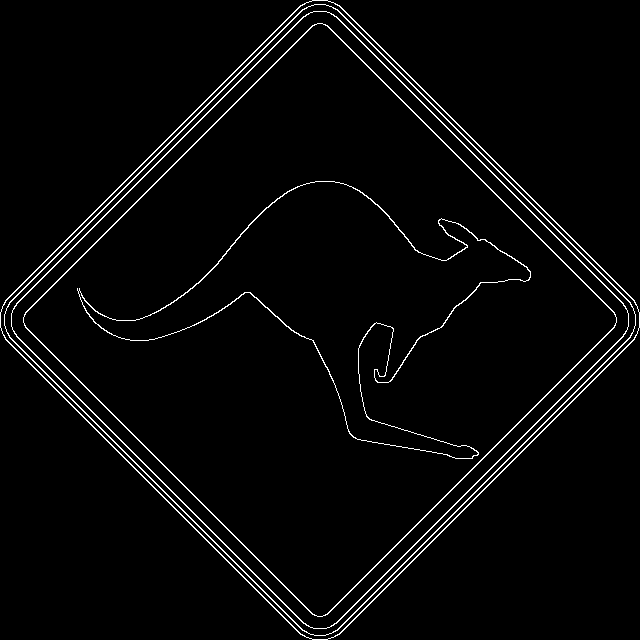

lowerThreshold =250
upperThreshold =10


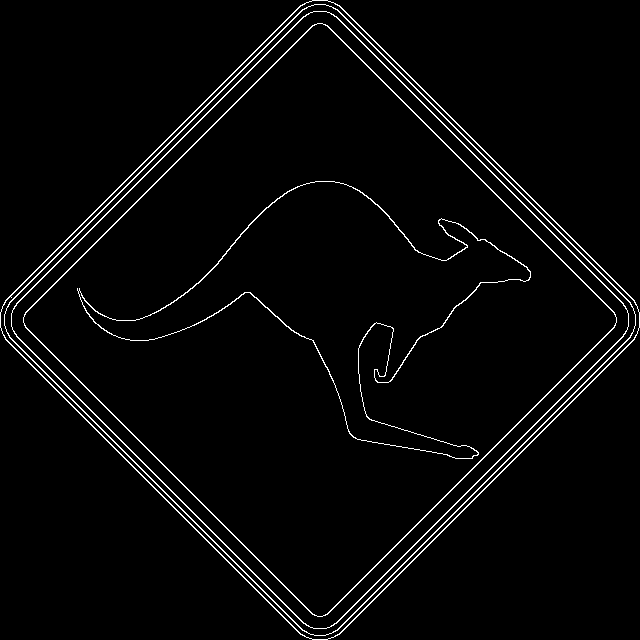

lowerThreshold =300
upperThreshold =320


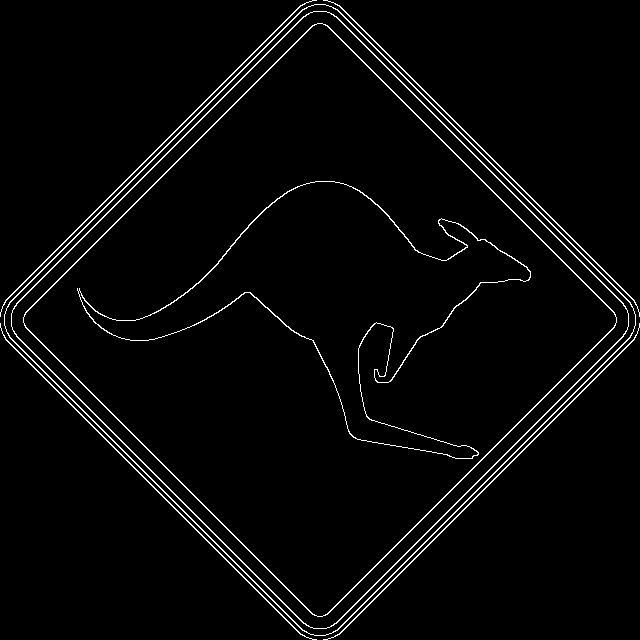

lowerThreshold =300
upperThreshold =300


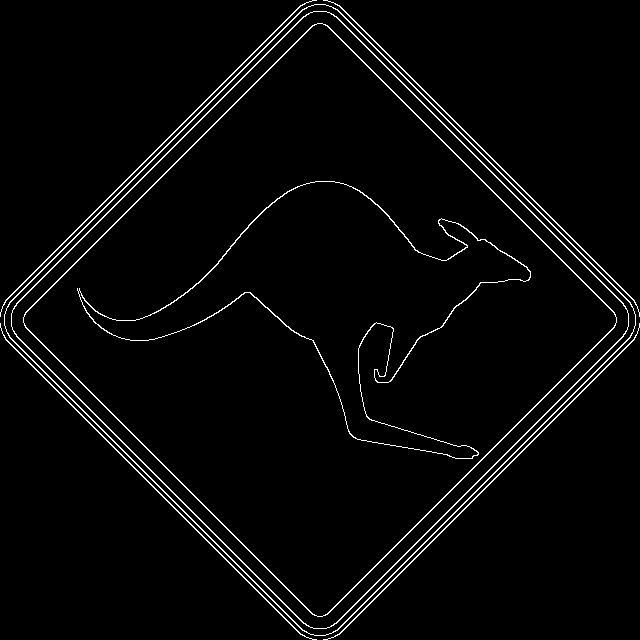

lowerThreshold =300
upperThreshold =250


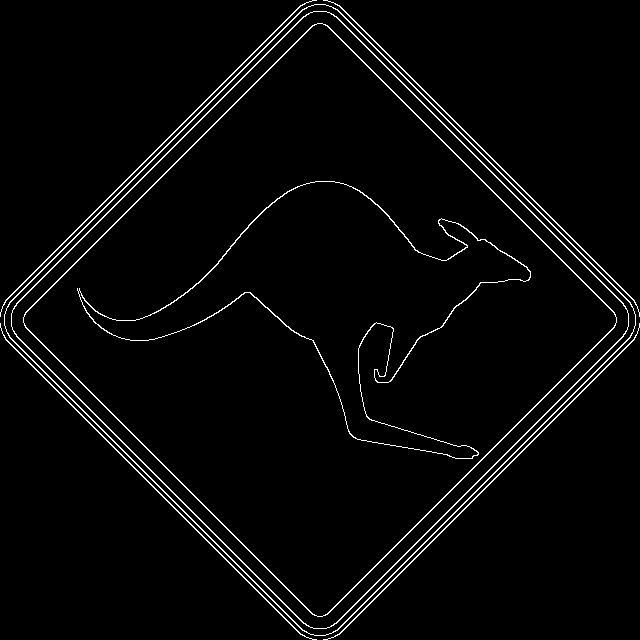

lowerThreshold =300
upperThreshold =200


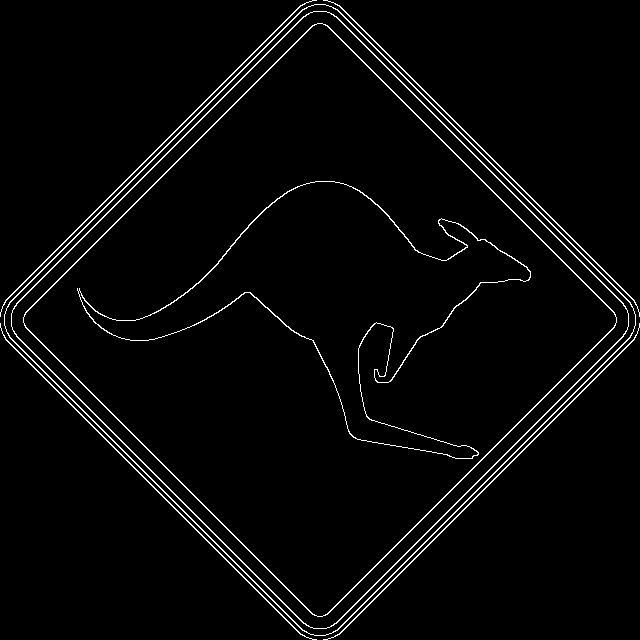

lowerThreshold =300
upperThreshold =150


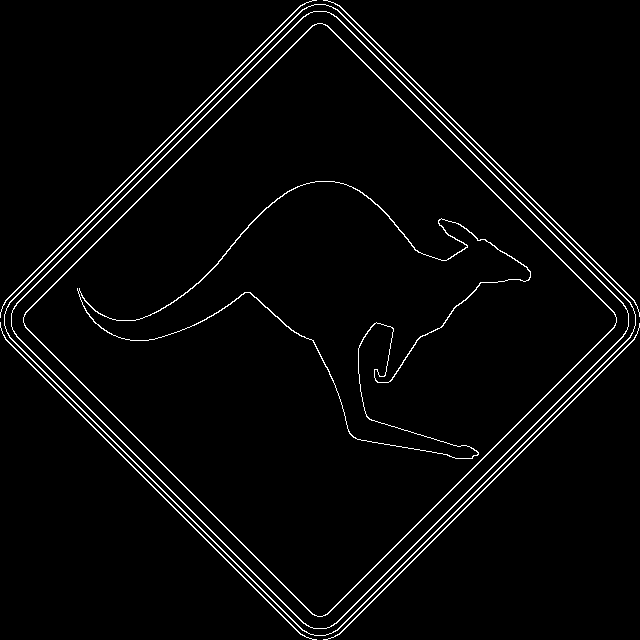

lowerThreshold =300
upperThreshold =100


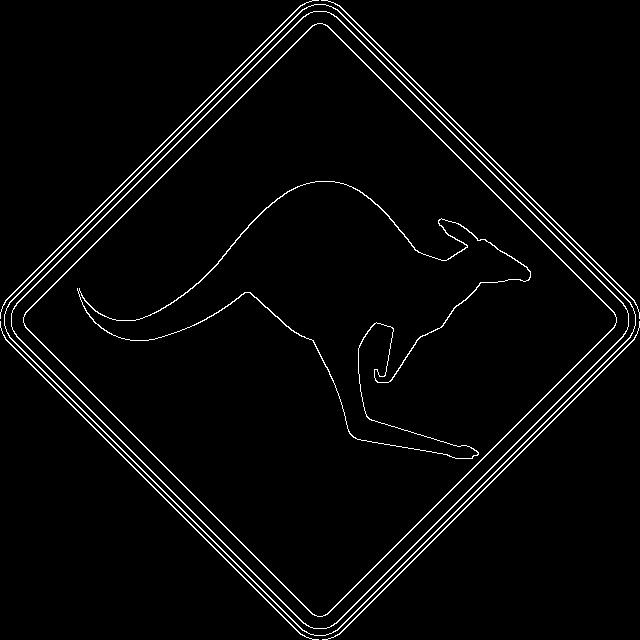

lowerThreshold =300
upperThreshold =50


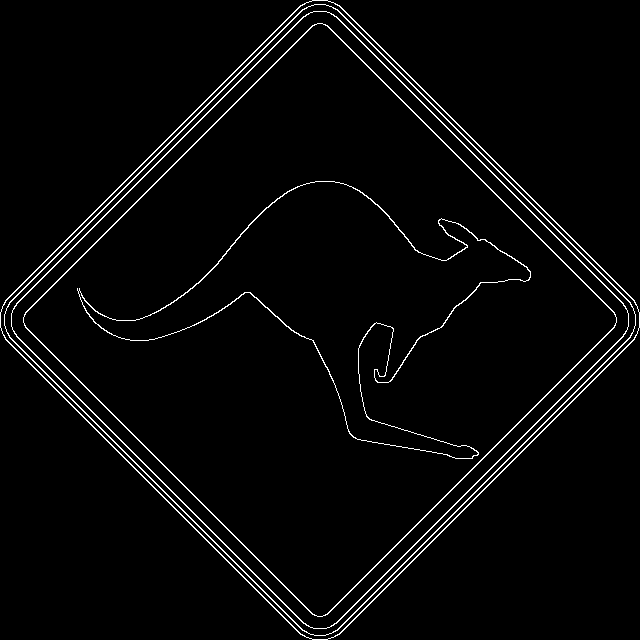

lowerThreshold =300
upperThreshold =10


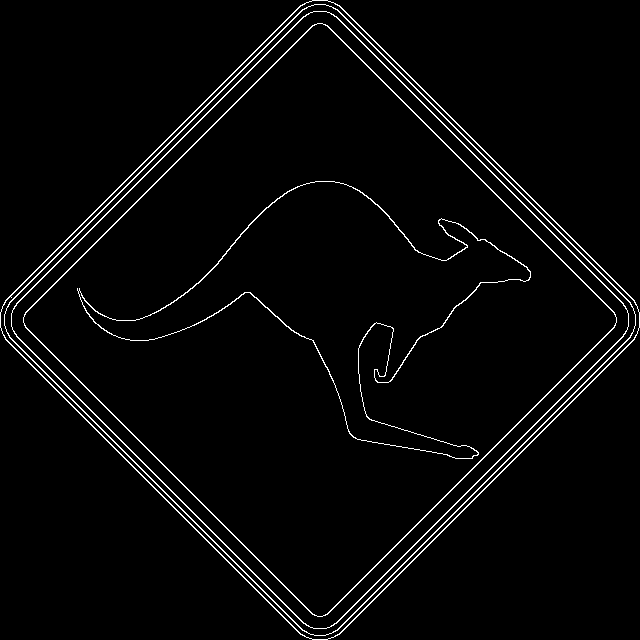

In [ ]:
lowerThreshold = [1,10,50,100,150,200,250,300,320]
upperThreshold = [320,300,250,200,150,100,50,10,1]
for i in range(8):
  for j in range(8):
    img_canny = cv2.Canny(img,lowerThreshold[i],upperThreshold[j])
    print('lowerThreshold ='+ str(lowerThreshold[i]))
    print('upperThreshold ='+ str(upperThreshold[j]))
    cv2_imshow(img_canny)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


3. Write a python code to implement Laplacian of Gaussian second order 
derivative filter.

In [23]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
# f="/content/drive/MyDrive/khadim hussain/lahore fscc/FB_IMG_1549449502768 (1).jpg"
img = cv2.imread('/content/drive/MyDrive/khadim hussain/lahore fscc/20190203160023_IMG_0201 (1).JPG',0)
# img = cv2.imread(f,0)
cv2_imshow(img)
print('processed image')
img_gaussian = cv2.GaussianBlur(img,(3,3),0)
laplacian = cv2.Laplacian(img_gaussian,cv2.CV_64F)
cv2_imshow(laplacian)
# cv2_imshow(img_gaussian)

Output hidden; open in https://colab.research.google.com to view.


4. Write a python program to perform edge detection of images in real-time
by capturing an image using webcam of your laptop. Apply all the edge 
detection algorithms we have learned in this lab to the image captured in 
real time.

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow



In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


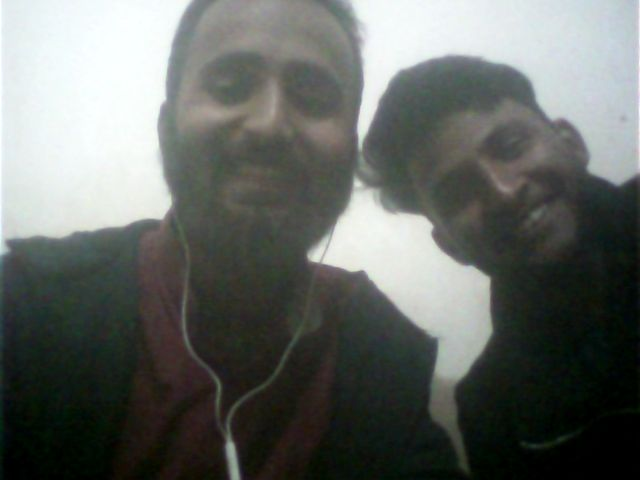

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [15]:
import os
import cv2
img = cv2.imread('/content/photo.jpg')
cv2.imwrite('astorii.jpg',img)
print('image saved')

image saved


Laplacian of  Guassian for edge detection


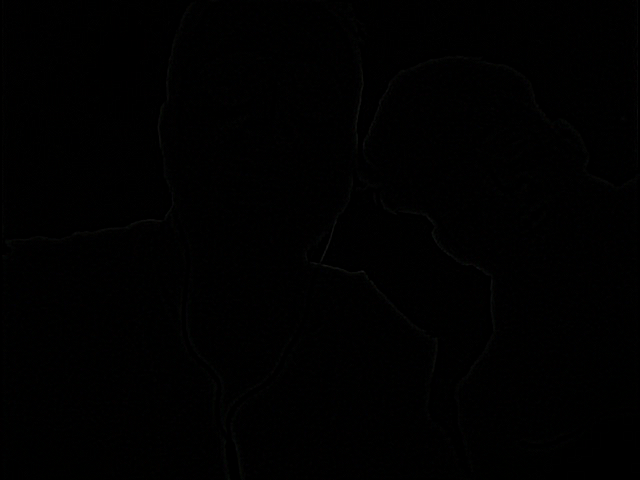

In [17]:
img_gaussian = cv2.GaussianBlur(img,(3,3),0)
laplacian = cv2.Laplacian(img_gaussian,cv2.CV_64F)
print('Laplacian of  Guassian for edge detection')
cv2_imshow(laplacian)